<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Segmentación de Clientes con Clustering Jerárquico y DBSCAN

El objetivo de este caso-taller es analizar una base de datos ficticia sobre clientes de una tienda y buscar encontrar grupos de clientes que permitan generar estrategias de marketing focalizadas. La base se encuentra en los `Archivos de Laboratorio` en la carpeta `data` y cuenta con 200 observaciones y 5 variables:

- `Id_Cliente`: identificador de cliente.
- `Genero`: género del cliente: Mujer, Hombre
- `Edad`: edad en años
- `Ingreso`: ingresos anuales
- `Puntaje_Gasto`: es una variable que mide cuán a menudo un cliente compra en la tienda, siendo 100 el puntaje más alto.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

En la carpeta `data` se encuentra el archivo `datos_clientes.csv` cargue estos datos en su *cuaderno*. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_datos = pd.read_csv("./data/datos_clientes.csv")
df_datos.head()

,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto
0,1,Mujer,41,98115.05,39
1,2,Mujer,20,35458.14,75
2,3,Mujer,68,59872.08,55
3,4,Hombre,63,48508.93,51
4,5,Mujer,31,44431.11,54


carga de datos de clientes

### 2. Análisis preliminar. 

Antes de comenzar el análisis de segmentación utilice estadísticas descriptivas para explorar la variables que se encuentran en los datos. En su análisis mencione si hay patrones que surgen del examen descriptivo de los datos; entre ellos si hay diferencias en los ingresos y los puntajes de gastos para mujeres y hombres, por grupos etarios (18-24, 25-34, 35-44, 45-54, 55-64, y 65+), y por grupos etarios y género. Discuta además si estas diferencias son estadísticamente significativas.

In [3]:
# Utilice este espacio para escribir el código.
n,v = df_datos.shape
print("cantidad de datos: {n}, cantidad de vairables: {v}".format(n=n,v=v))

cantidad de datos: 200, cantidad de vairables: 5


In [4]:
#reporte de datos nulos
df_datos.isna().sum()

Id_Cliente       0
Genero           0
Edad             0
Ingreso          0
Puntaje_Gasto    0
dtype: int64

El dataset no tiene valores nulos y cuenta con 5 variables las cuales se listan a continuacion :

* Variables Numericas
    * **Id_Cliente**: identificador unico del cliente
    * **Edad**: edad del cliente en años
    * **Ingreso**: Ingresos anuales del cliente
    * **Puntaje_Gasto**: variable que mide cuán a menudo un cliente compra en la tienda, siendo 100 el puntaje más alto.
* Variables Categoricas
    * **Genero**: valor biinario entre (Mujer, Hombre)

In [5]:
df_datos.describe()

,Id_Cliente,Edad,Ingreso,Puntaje_Gasto
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60624.446600,50.200000
std,57.879185,13.969007,26262.903416,25.823522
min,1.000000,18.000000,13458.020000,1.000000
25%,50.750000,28.750000,41512.787500,34.750000
50%,100.500000,36.000000,60777.960000,50.000000
75%,150.250000,49.000000,77143.865000,73.000000
max,200.000000,70.000000,138584.520000,99.000000


In [6]:
# Creacion de funcion para calcular los grupos etarios
def rangos_etarios(row):
    edad = row
    if edad < 18:
        return '0. -18'
    elif edad <= 24:
        return '1. 18-24'
    elif edad <= 34:
        return '2. 25-34'
    elif edad <= 44:
        return '3. 35-44'
    elif edad <= 54:
        return '4. 45-54'
    elif edad <= 64:
        return '5. 55-64'
    elif edad >= 65:
        return '6. 65+'
    

# Aplicar la función a la columna 'Fecha de Llegada'
df_datos['rango_edades'] = df_datos['Edad'].apply(rangos_etarios)

#### Descripctiva variables generales
A continuacion la descripcion de cada variable de forma independiente

In [7]:
def describe_variables(df,variable,grupo=None):
    '''
    Funcion para dar informacion descriptiva de una variable

    parametros:
    df: dataframe de donde se quiere obtener los datos
    variable: string con el nombre de una columna del dataframe que quiere ser descrita
    grupo: string, con el nombre de otra columna del dataframe df para dar informacion agrupando por esta variable
    '''
    
    # valida si hay que agrupar 
    if grupo is None:

        # muestra informacion descriptiva
        col = variable
        display(df[[col]].describe().T)
        

        # Proceso para graficar de forma descriptiva los datos
        n_cols = 3
        n_rows = 1

        fig,ax =plt.subplots(n_rows,n_cols,figsize=(n_cols*8,n_rows*5))
        axs = ax.flatten()

        # Define la grafica de histograma
        sns.histplot(data=df, x=col, color="seagreen",ax=axs[0])
        axs[0].set_title("Histograma de la variable: {}".format(col))
        
        # Define la grafica de boxplot
        sns.boxplot(data=df, x=col, color="seagreen",ax=axs[1])
        axs[1].set_title("Boxplot de la variable {}".format(col))

        # Define la grafica de violin mas una ilustracion de la concentracion de los datos
        sns.violinplot(data=df.sort_values(by=col), x=variable,ax=axs[2], inner="quart", color="seagreen")
        sns.swarmplot(data=df.sort_values(by=col), x=variable,ax=axs[2], color="white")
        axs[2].set_title("Dispersion de la variable {}".format(col))

        plt.show()
    
    # proceso si hay que agrupar por una de las variables
    else:
    
        # define la variable a agrupar
        col = grupo
        
        #muestra valores descriptivos de la variable de entrada para cada grupo definido por la variable col
        display(df.groupby(col)[[variable]].describe())


        # obtiene los valores unicos de la categoria que agrupa y los ordena
        vars = np.sort(df_datos[col].unique())

        n_cols = 2
        n_rows = int(np.ceil((len(vars)+ 2)/n_cols)) 

        # proceso de graficar
        fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*15,n_rows*6.5))
        axs = ax.flatten()


        # crea un histograma por cada categoria del grupo
        for i,v in enumerate(vars):
            
            fltr = df[col] == v
            sns.histplot(data=df[fltr],x=variable, color="seagreen",ax=axs[i])
            axs[i].set_title("distribucion de variable {c} para los categoria: {i}".format(c=col, i = v))


        # genera grafica de boxplot teniendo en cuenta cada agrupacion
        sns.boxplot(data=df.sort_values(by=col), x=variable, hue=col,ax=axs[i+1], y=col, legend=True)
        axs[i+1].set_title("Boxplot de la variable {}".format(col))
        
        # genera grafica de violinplot teniendo en cuenta cada agrupacion
        sns.violinplot(data=df.sort_values(by=col), x=variable,ax=axs[i+2], y=col,hue=col, inner="quart")
        sns.swarmplot(data=df.sort_values(by=col), x=variable,ax=axs[i+2], y=col, color="white")
        axs[i+2].set_title("Dispersion de la variable {} por categorias".format(col))

    plt.show()

def describe_variables_categ(df,col,grupo=None):
    '''
    Funcion para obtener valores descriptivos de las variables categoricas

    parametros:
    df: dataframe de donde se quiere obtener los datos
    variable: string con el nombre de una columna del dataframe que quiere ser descrita
    grupo: string, con el nombre de otra columna del dataframe df para dar informacion agrupando por esta variable
    '''
    
    # Valida si tiene que agrupar
    if grupo is None:
        
        # genera el dataframe con las frecuencias para cada categoria de la variable de entrada
        gr = df.groupby(col).count()[["Id_Cliente"]]
        
        #calculo de porcentaje de cada categoria
        gr["pct"] = np.round(100*gr/gr.sum(),2)
        gr = gr.reset_index()
        display(gr)

        # Genera graficos de frecuencia
        fig,ax =plt.subplots(1,1,figsize=(8,5))
        sns.barplot(data=gr, x=col, y="Id_Cliente", color="seagreen",ax=ax ,errorbar=None)
        ax.set_title("Grafica de Barras de la variable: {}".format(col))

        plt.show()
    else:
        # genera el dataframe con las frecuencias para cada categoria agrupando por las dos variables ingresasdas como parametro
        gr = df.groupby([col,grupo]).count()[["Id_Cliente"]].reset_index()
        display(gr)
        
        # Genera graficos de frecuencia
        fig,ax =plt.subplots(1,1,figsize=(8,5))
        sns.barplot(data=gr.sort_values(by=col), x=col, y="Id_Cliente", color="seagreen",ax=ax, hue=grupo, errorbar=None)
        ax.set_title("Grafica de Barras de la variable {a}, agrupada por {b}".format(a=col, b = grupo))

        plt.show()

##### Variable Edad

,count,mean,std,min,25%,50%,75%,max
Edad,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0


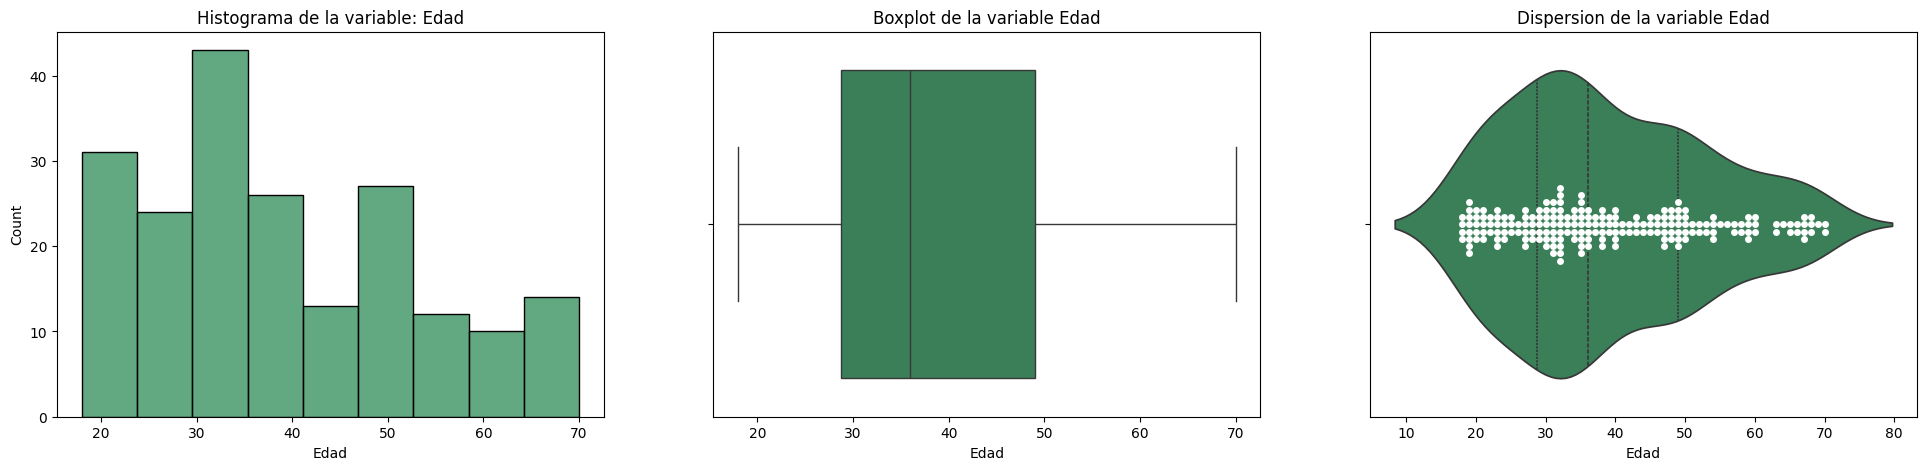

In [8]:
describe_variables(df_datos,variable="Edad")

En la variable edad se ve que la edad minima es de 18 años, la maxima de 70 años y en promedio la edad es de aprox 39 años, con las distribuciones se observa que las edades estan mas concentradas entre los 30 - 40 años

##### Variable rango por edades

,rango_edades,Id_Cliente,pct
0,1. 18-24,35,17.5
1,2. 25-34,54,27.0
2,3. 35-44,42,21.0
3,4. 45-54,39,19.5
4,5. 55-64,16,8.0
5,6. 65+,14,7.0


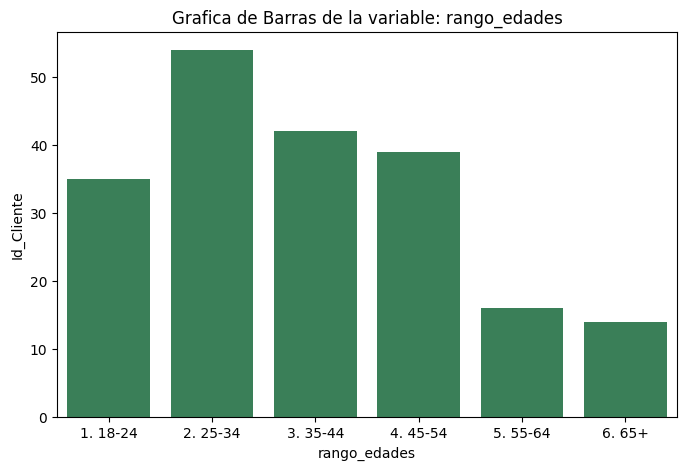

In [9]:
describe_variables_categ(df_datos, col="rango_edades")

para los rangos de edades definidos se ve que la concentracion de datos esta en edades menores a 55 años, siendo el rango de 25-34 años el de mayor concentracion

##### Variable Ingreso

,count,mean,std,min,25%,50%,75%,max
Ingreso,200.0,60624.4466,26262.903416,13458.02,41512.7875,60777.96,77143.865,138584.52


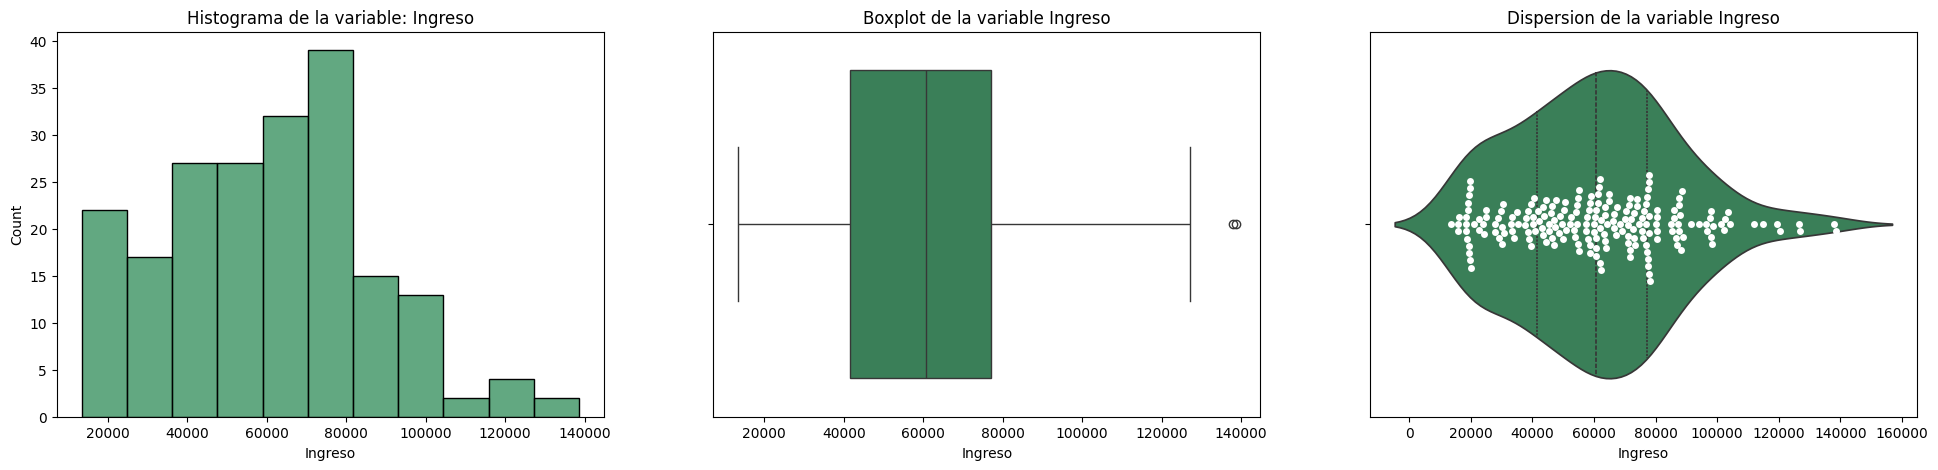

In [10]:
describe_variables(df_datos,variable="Ingreso")

Esta variable presenta una concentracion de datos en los valores bajos y medios como se ve en el diagrama de violin, con un valor promedio de aprox 60k, en este caso se ve que para los valores altos hay menor concentracion de clientes

##### Variable Puntaje Gasto

,count,mean,std,min,25%,50%,75%,max
Puntaje_Gasto,200.0,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


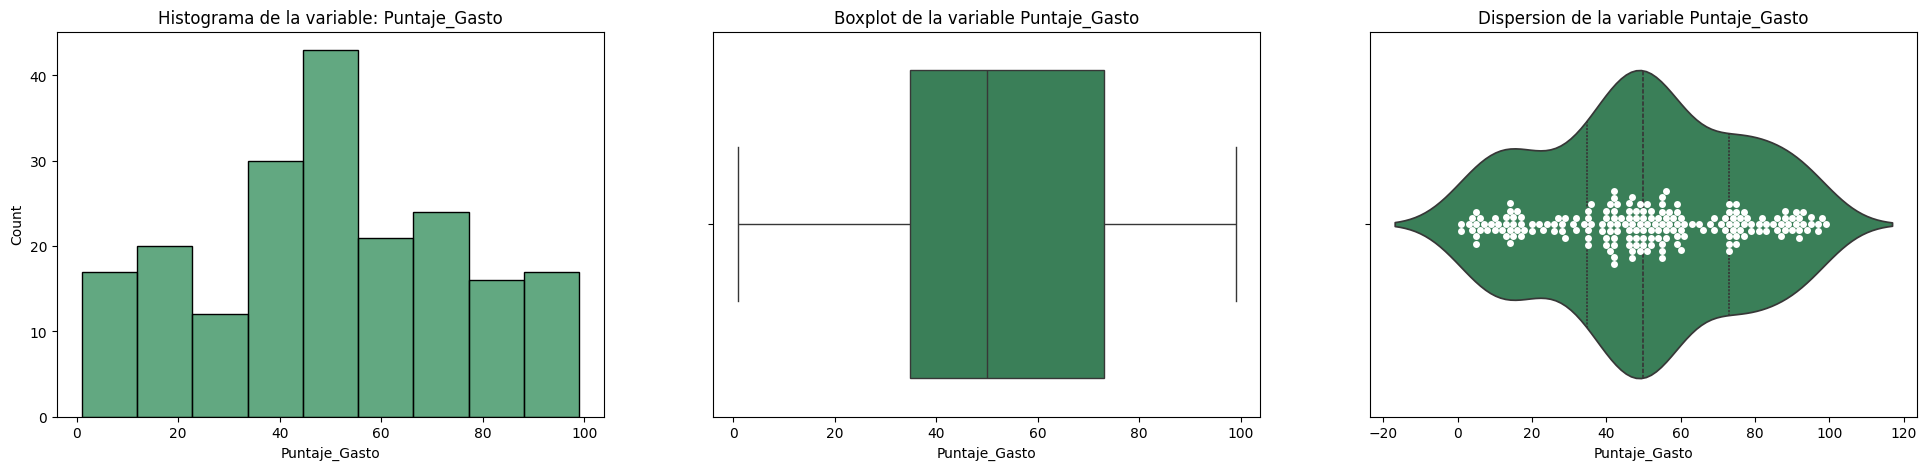

In [11]:
describe_variables(df_datos,variable="Puntaje_Gasto")

Esta variable cuenta con una media y mediana aprox de 50, lo cual nos indicaria una posible distribucion normal, sin embargo al ver le histograma y la grafica de violin se ve que no es el caso y que tambien presenta altas concentraciones de datos en los valores bajos y altos

##### Variable Genero

,Genero,Id_Cliente,pct
0,Hombre,88,44.0
1,Mujer,112,56.0


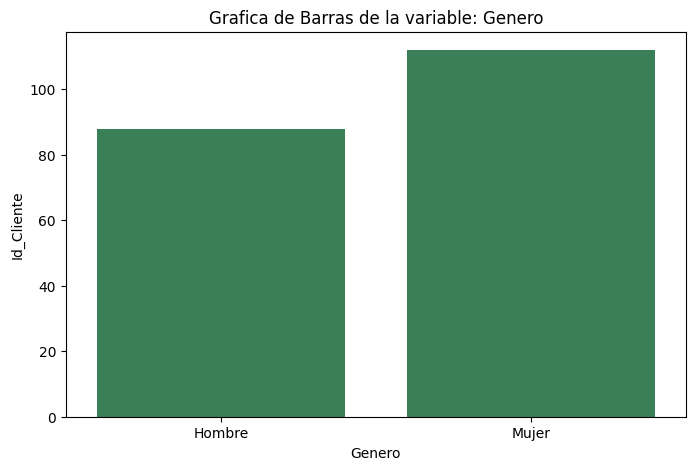

In [12]:
describe_variables_categ(df_datos, col="Genero")

Para esta variable se ve una mayor presencia de mujeres que de hombres

#### Relacion entre variables

##### Relacion entre variables: Inreso y Genero

Ingreso                                                               \
         count          mean           std       min         25%        50%   
Genero                                                                        
Hombre    88.0  62126.660455  26765.492953  13458.02  45003.0800  61706.565   
Mujer    112.0  59444.135714  25920.459216  15766.84  40013.4125  59355.305   

                               
               75%        max  
Genero                         
Hombre  77731.3025  138584.52  
Mujer   76788.3875  126685.78

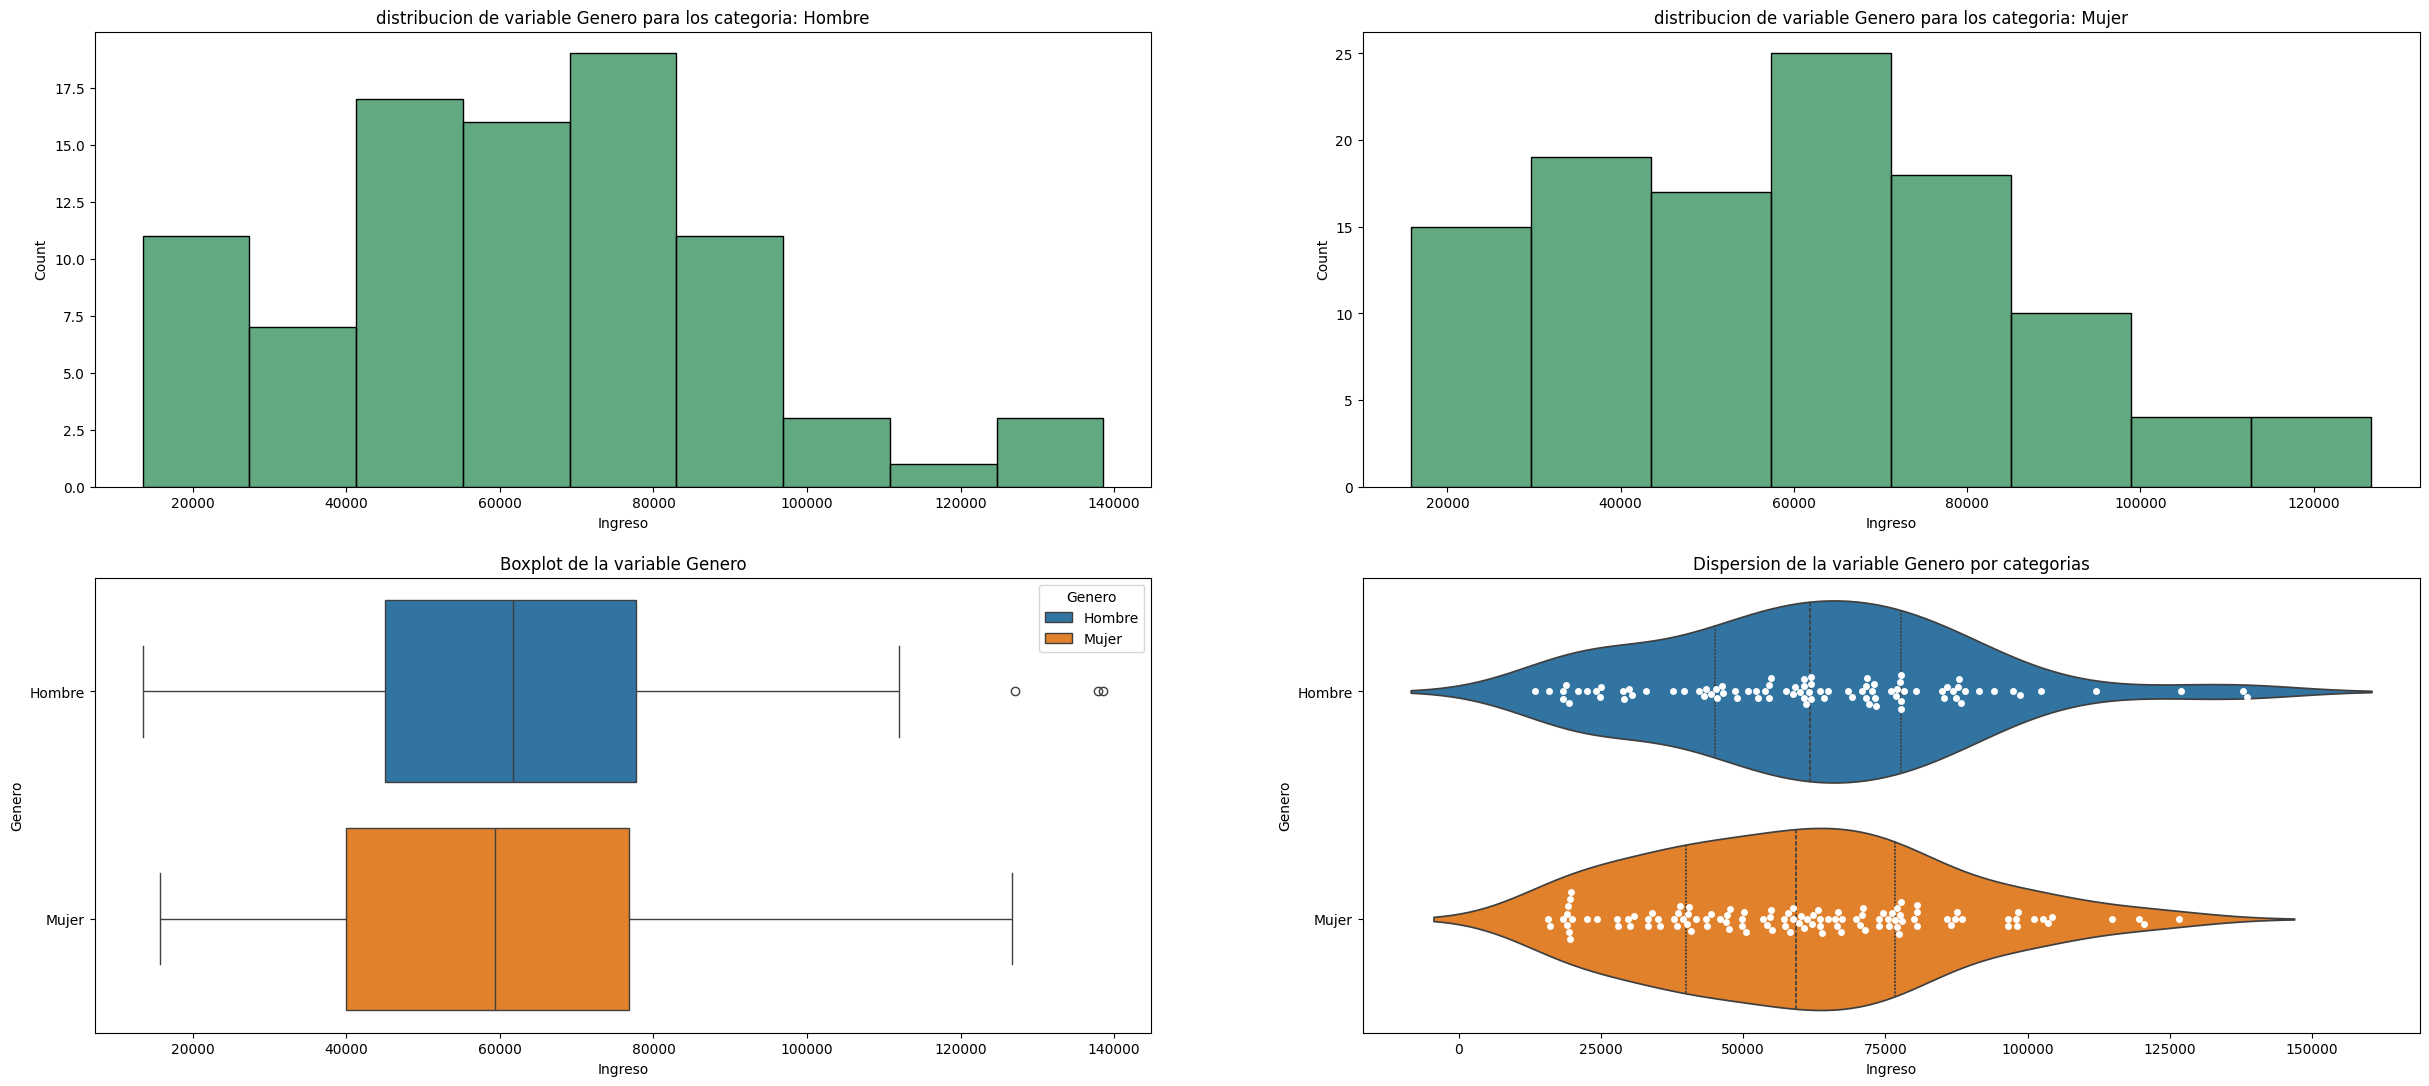

In [13]:
describe_variables(df_datos,"Ingreso",grupo="Genero")

al observar la relacion de estas dos variables se ve que hay una mayor concentracion de mujeres con ingresos bajos que de hombres, particularmente se evidencia al ver los valores del percentil 25 (45k en hombres vs 40k en mujeres). Luego de este punto la distribucion tiende a ser mas similar, lo cual se puede validar comparando los valores de los demas percentiles 

##### Relacion entre variables: Ingreso - Rango Edades

Ingreso                                                    \
               count          mean           std       min         25%   
rango_edades                                                             
1. 18-24        35.0  44454.795429  20378.208373  13458.02  24465.3200   
2. 25-34        54.0  71157.328148  27885.788157  19003.52  50141.6575   
3. 35-44        42.0  66957.096905  27722.049259  18797.16  50771.2225   
4. 45-54        39.0  58786.491026  24276.268114  24402.32  42447.5600   
5. 55-64        16.0  56357.093125  22351.828240  18434.74  46947.2075   
6. 65+          14.0  51420.789286  12686.437083  18437.21  45659.1800   

                                                
                    50%         75%        max  
rango_edades                                    
1. 18-24      46455.340  61564.3550   80360.65  
2. 25-34      75824.910  85872.9375  138584.52  
3. 35-44      71638.860  86762.7750  119534.68  
4. 45-54      55041.390  67337.0950  126685.78  
5. 55-64      54718.180  72384.2775   94049.49  
6. 65+        51546.645  61858.4675   64156.37

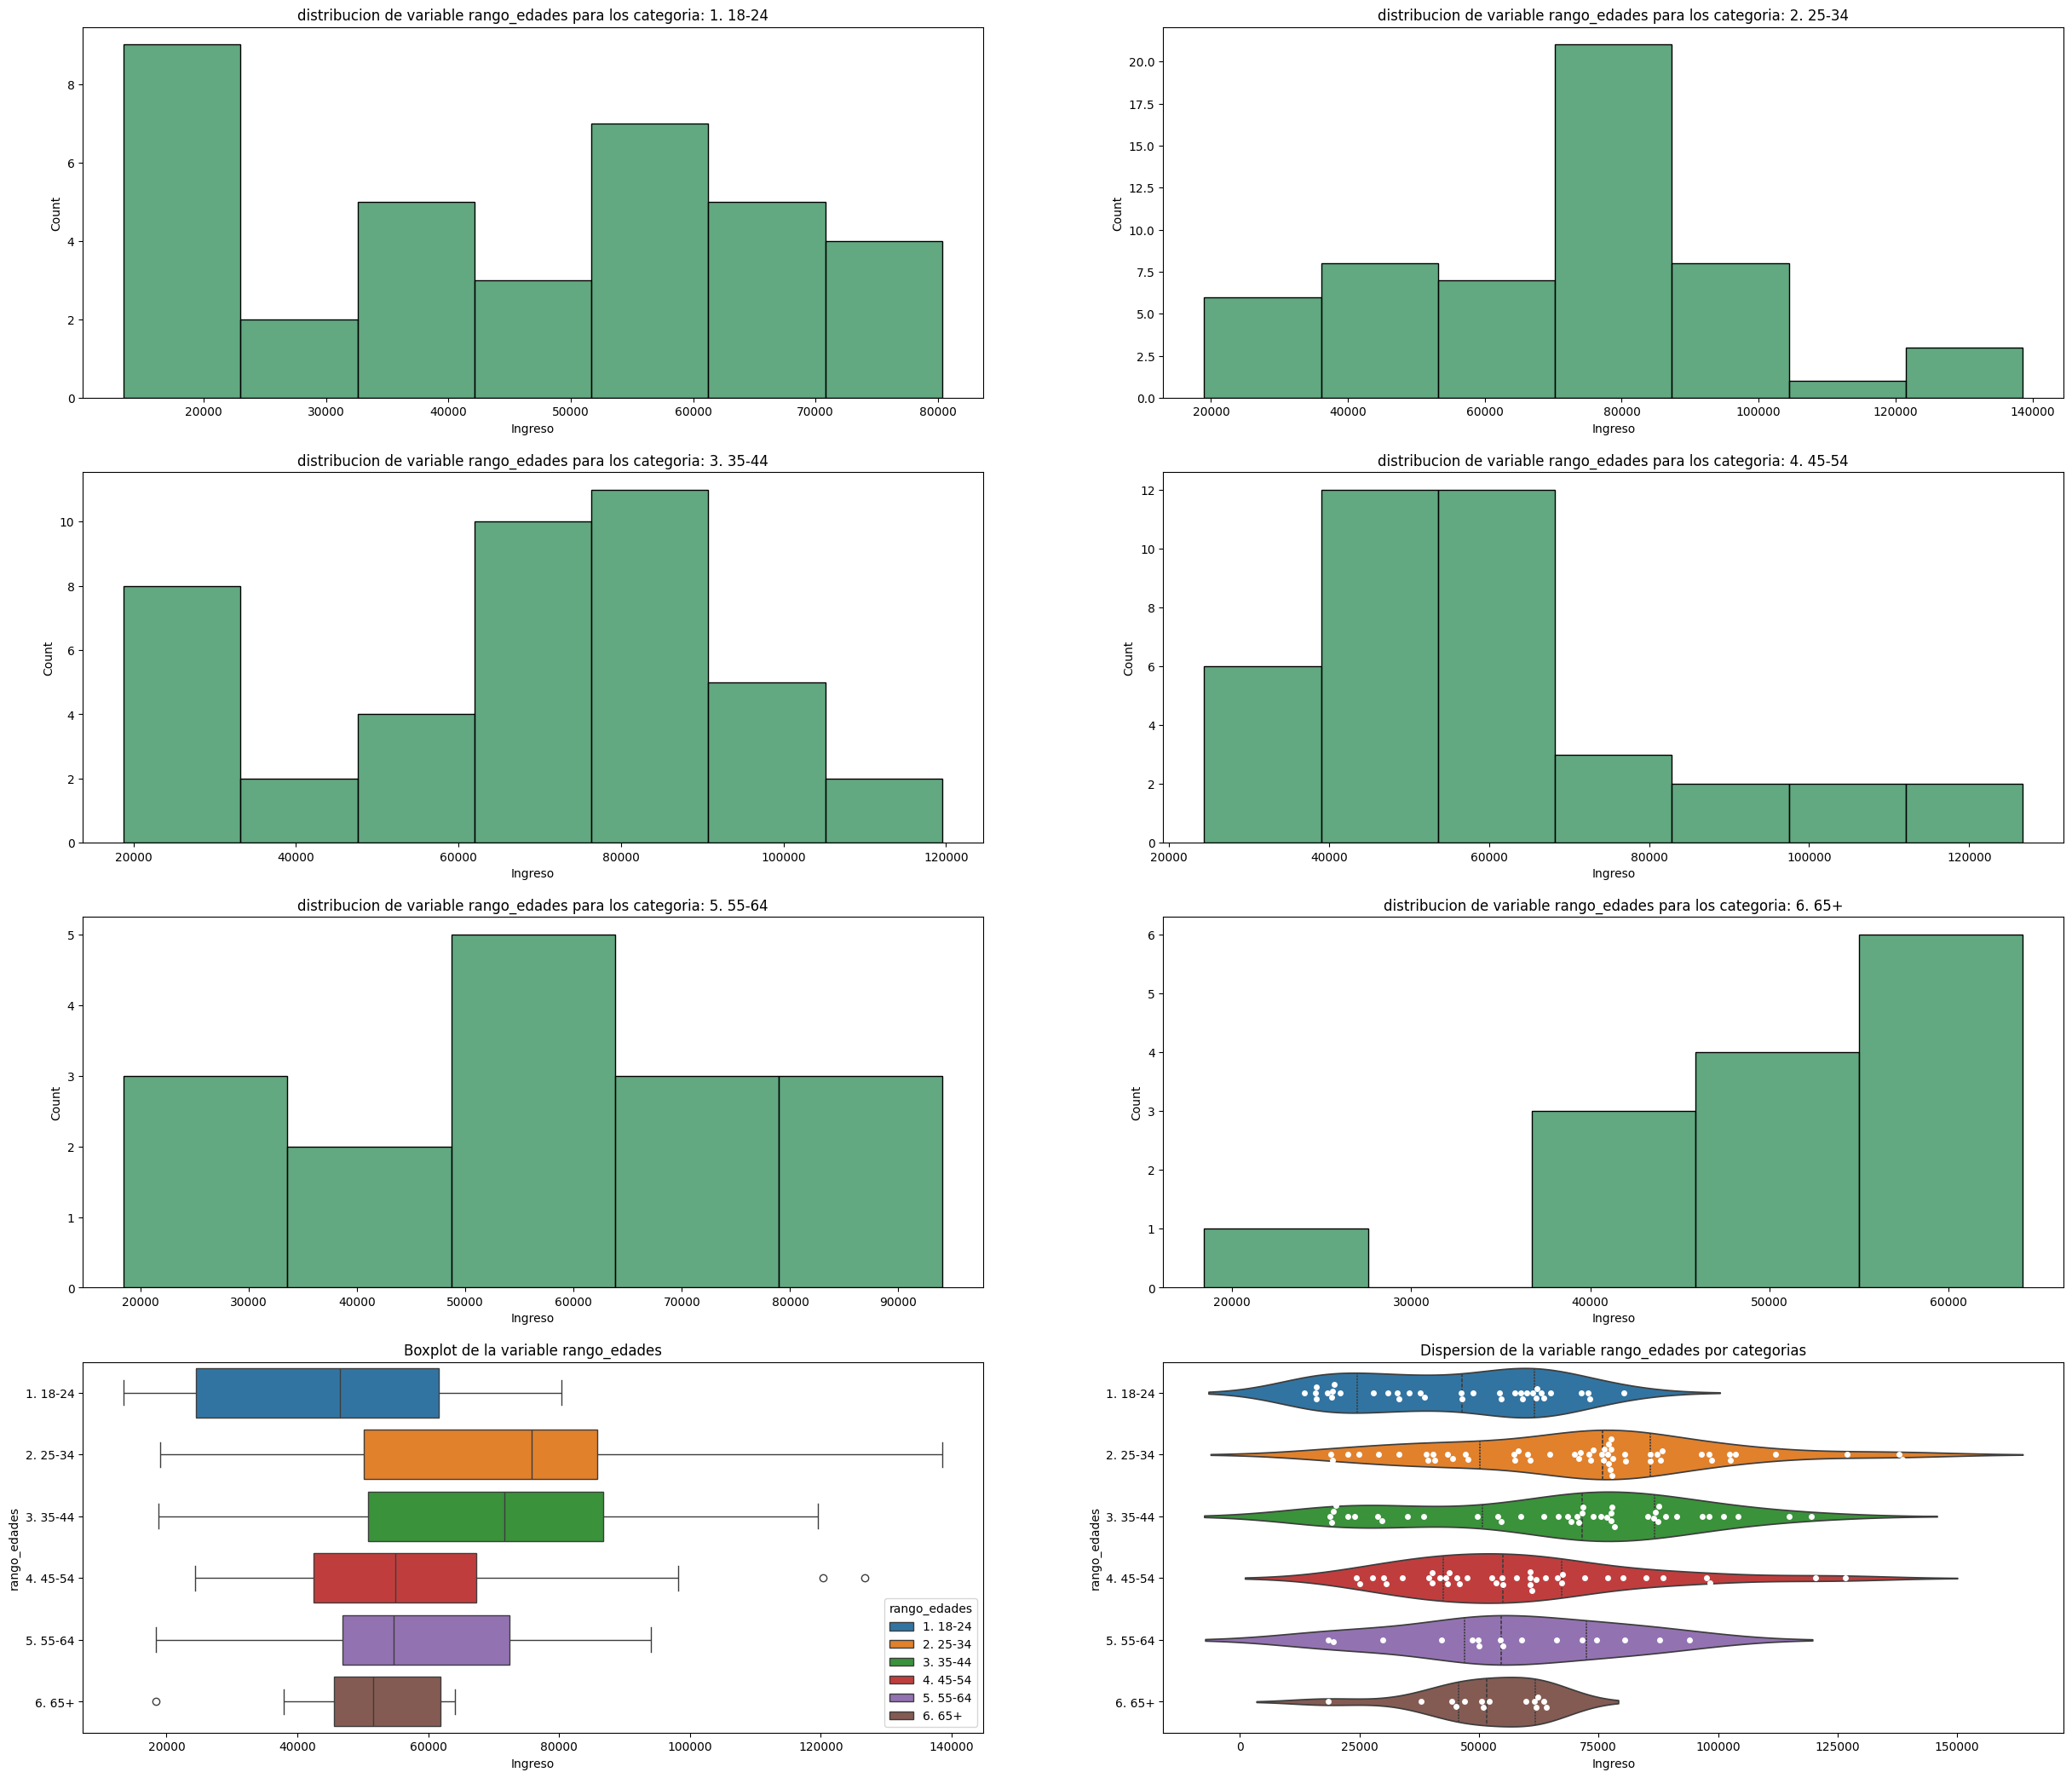

In [14]:
describe_variables(df_datos,"Ingreso",grupo="rango_edades")

En esta variable se ve mas marcada la diferencia de ingresos dependiendo de la edad, siendo las personas menores (18-24 años) las que en promedio tienen menor ingreso, luego siguen los 2 rangos de edad (25-34 años, 35-44 años) que en promedio tienen el ingreso mas alto, a partir de este punto los ingresos van disminuyendo.

Otro comportmamiento a notar qes que la dispersion de datos es mayor para los rangos de edad entre (25-34 años, 35-44 años) esto se valida mirando los valores de la desviacion estandar. Esto puede darse ya que estas son las edades en donde las personas son laboralmente activas, durante este periodo habra personas que incrementen sus ingresos mientras que otras permaneceran en los mismos rangos

##### Relacion entre variables: Puntaje Gasto y Genero

Puntaje_Gasto                                                  
               count       mean       std  min   25%   50%   75%   max
Genero                                                                
Hombre          88.0  48.511364  27.89677  1.0  24.5  50.0  70.0  97.0
Mujer          112.0  51.526786  24.11495  5.0  35.0  50.0  73.0  99.0

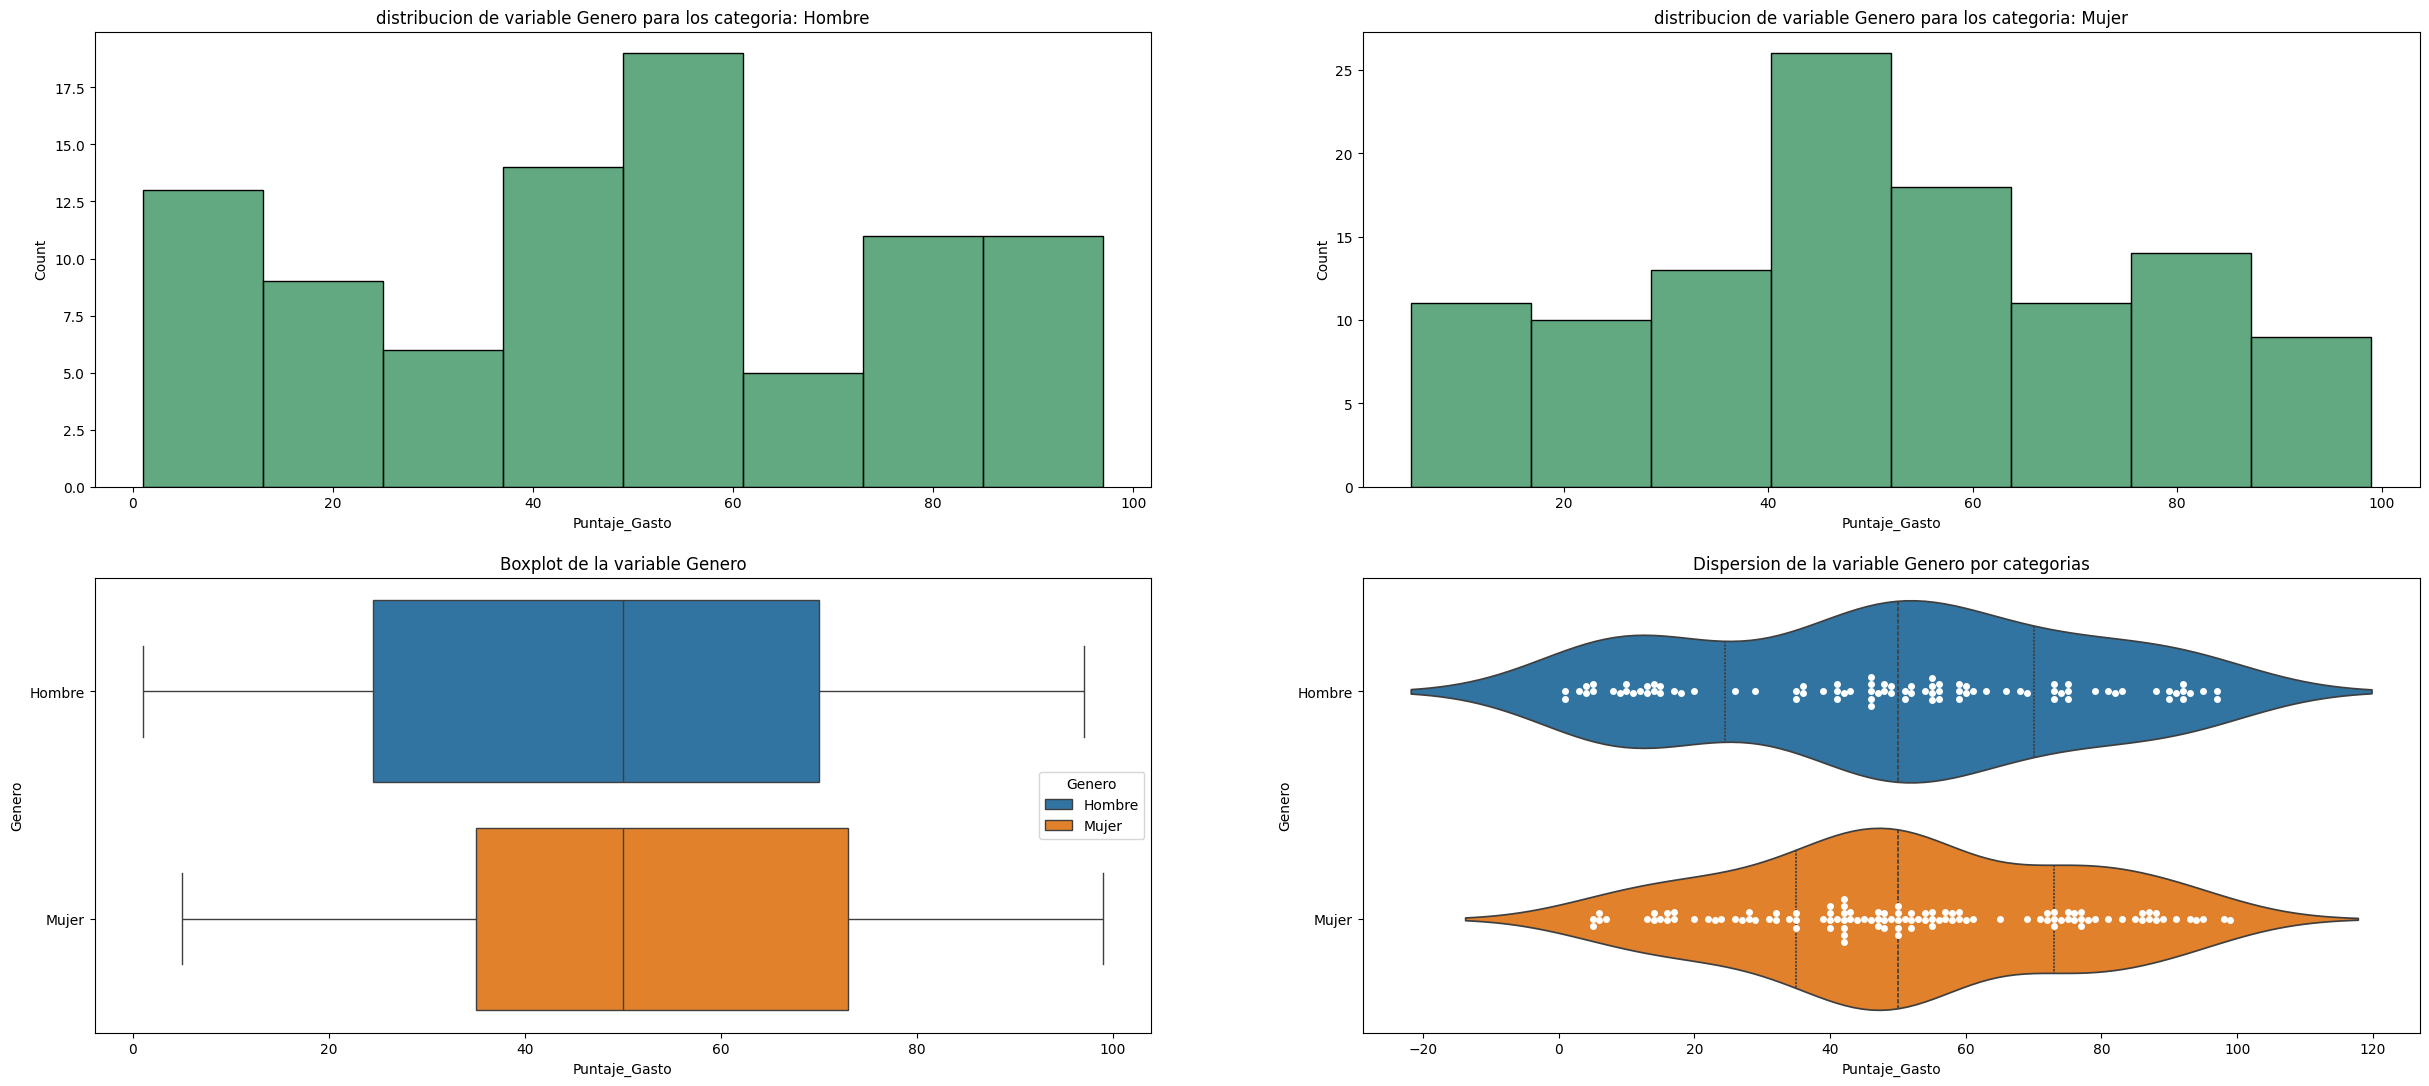

In [15]:
describe_variables(df_datos,"Puntaje_Gasto",grupo="Genero")

Al observar la diferencia en gastos por genero se ve que para este set de datos las mujeres tienden a gastar mas que los hombres, esto se evudencia en los diagramas de boxplot y al ver la comparacion de los percentiles 25 y 75, adicionalmente la desviacion estandar de los hombres es mayor que la de las mujeres indicando que los gastos realizados por los hombres comprenden un rango mayor que el gasto de las mujeres

##### Relacion entre variables: Puntaje Gasto y Rango Edades

Puntaje_Gasto                                                  \
                     count       mean        std   min    25%   50%    75%   
rango_edades                                                                 
1. 18-24              35.0  56.257143  24.659258   5.0  44.00  55.0  76.50   
2. 25-34              54.0  63.166667  24.283506   1.0  47.75  70.0  82.75   
3. 35-44              42.0  49.428571  30.700078   1.0  21.50  41.0  75.75   
4. 45-54              39.0  36.230769  16.261776   4.0  25.00  42.0  47.50   
5. 55-64              16.0  32.312500  21.752299   3.0  13.25  39.0  51.00   
6. 65+                14.0  46.714286  11.431593  14.0  43.75  49.0  54.25   

                    
               max  
rango_edades        
1. 18-24      94.0  
2. 25-34      97.0  
3. 35-44      99.0  
4. 45-54      59.0  
5. 55-64      60.0  
6. 65+        59.0

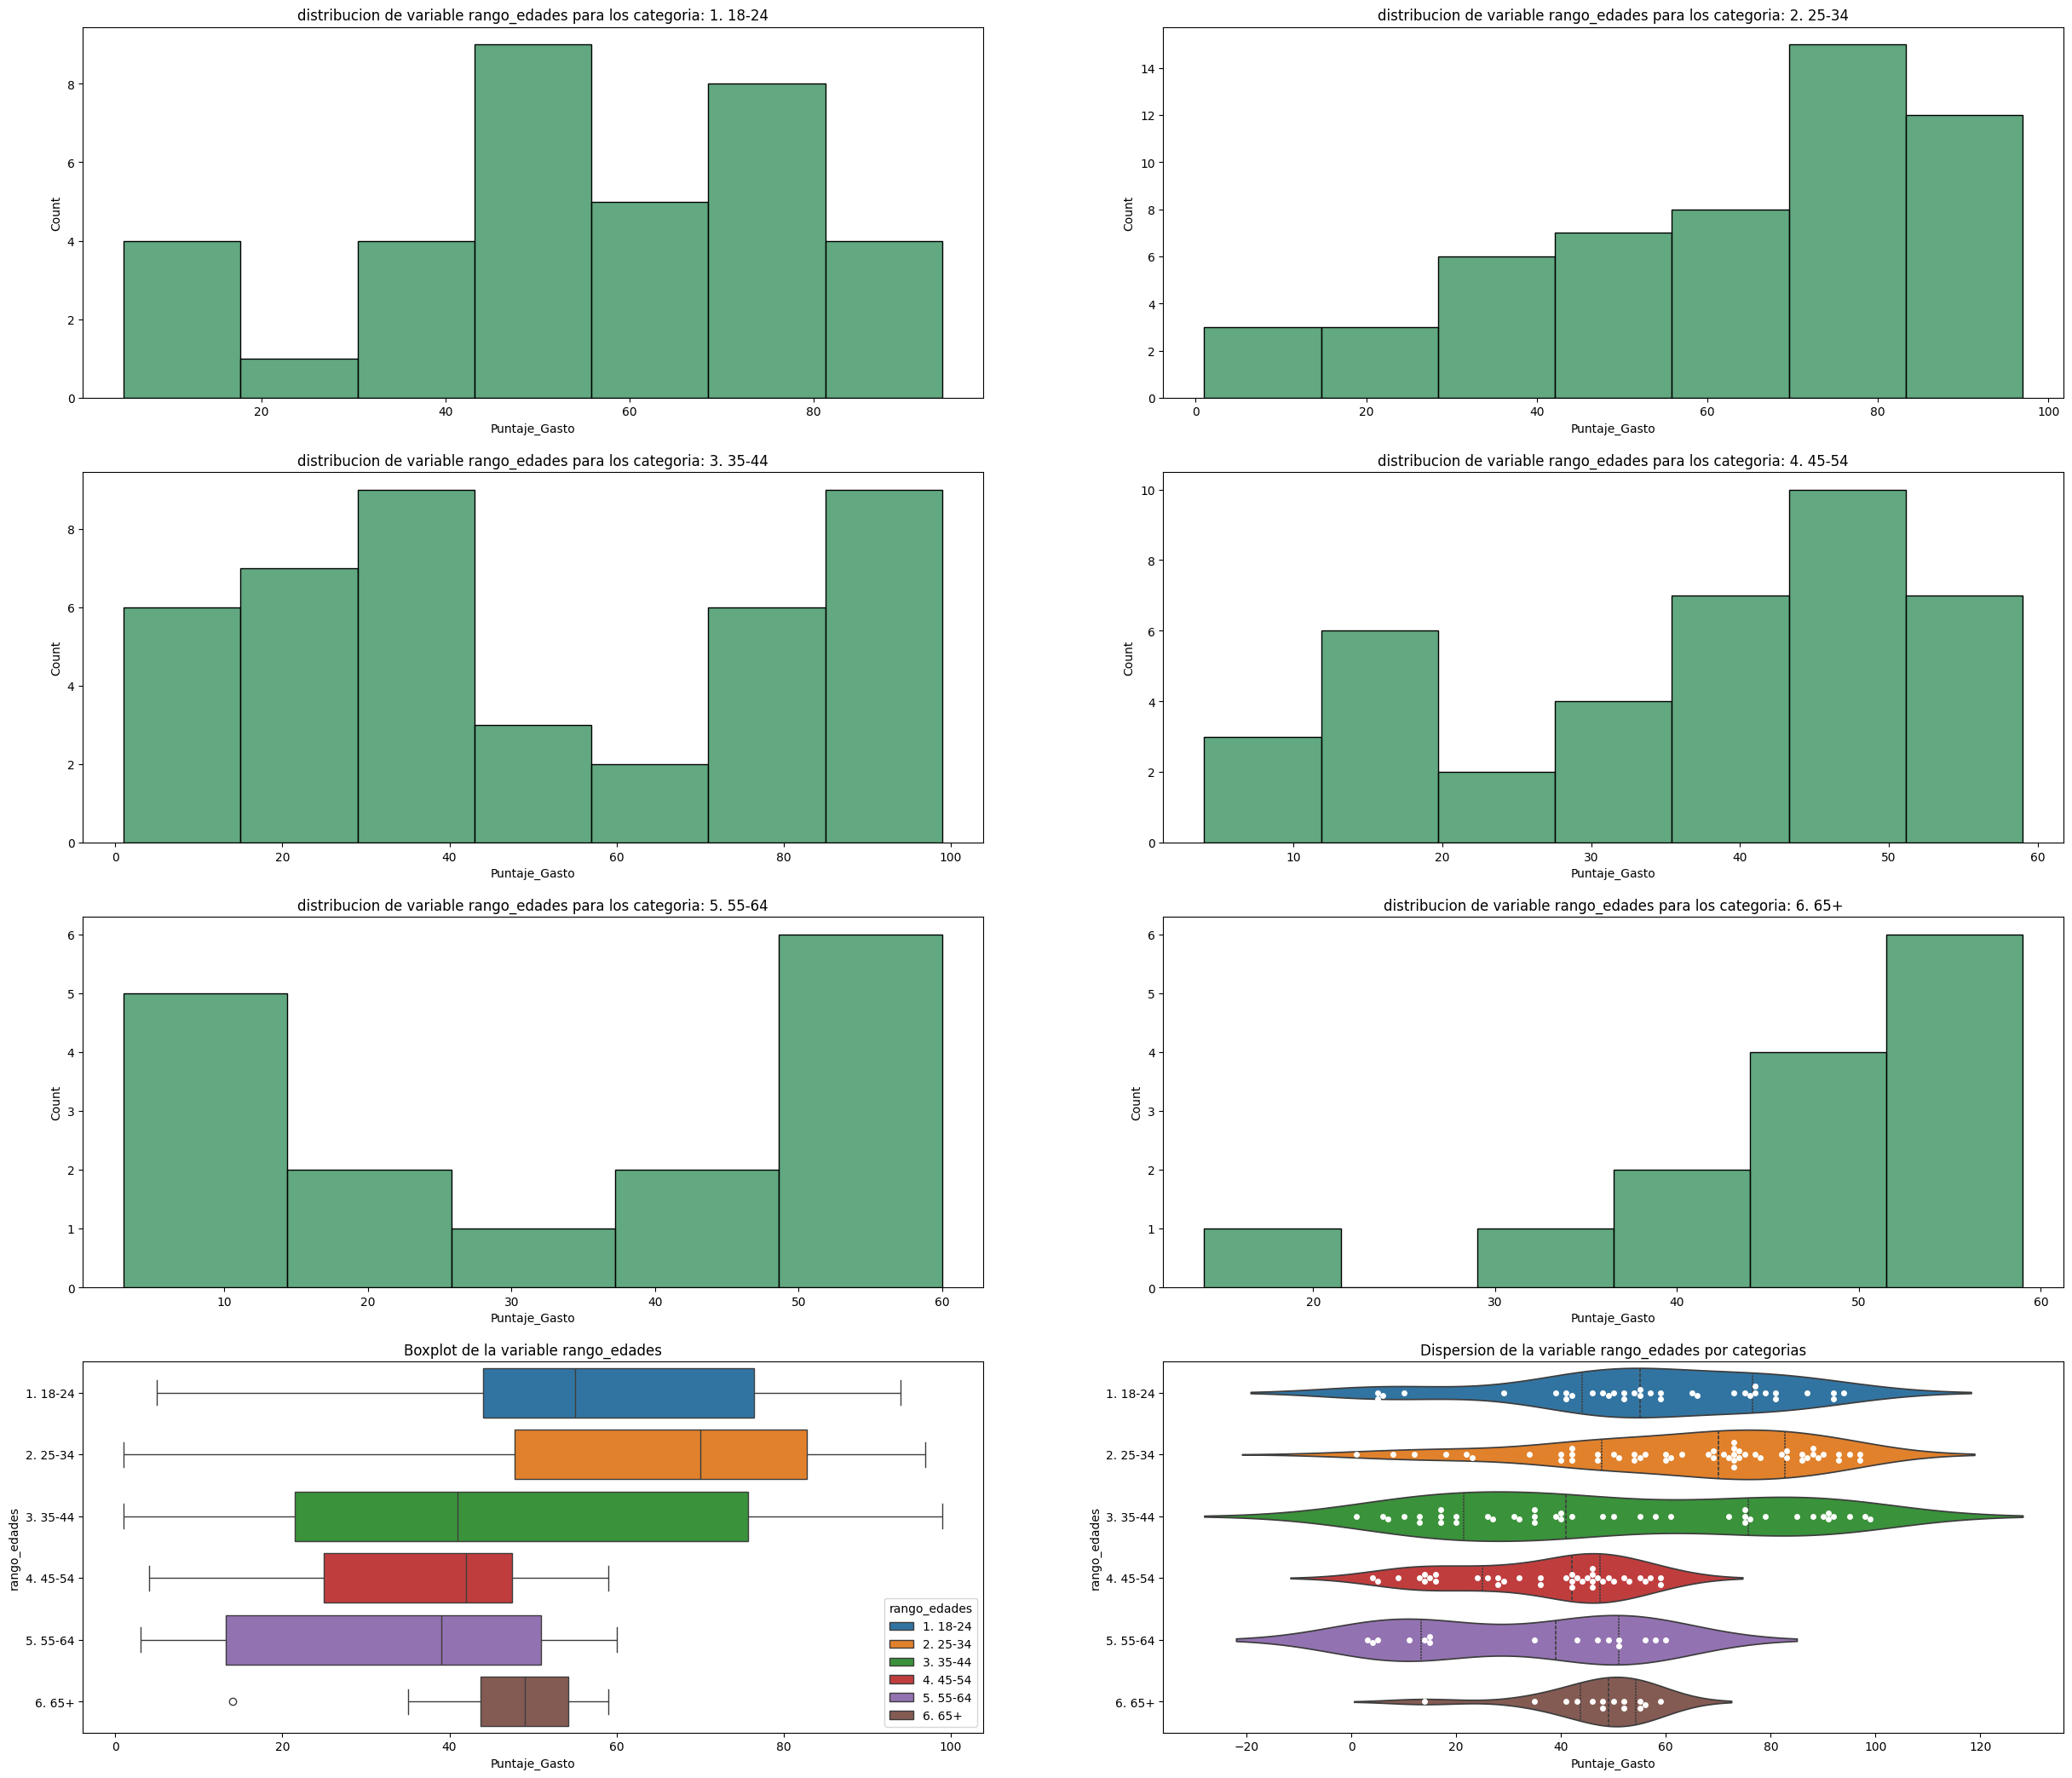

In [16]:
describe_variables(df_datos,"Puntaje_Gasto",grupo="rango_edades")

Nuevamente se ve una difrencia marcada en los gastos por rangos de edad, el gasto mas alto se da en los rangos de edad (18-24 ñoas, 25-34 años) esto se ve en los diagranas de boxplot, viendo que para estos rangos de edad el percentil 25 esta por encima del gasto promedio del resto de edades, quizas esto se debe a una vida mas activa en estos rangos de edad u otras necesidades de cada persona. 

Para el rango de edad de 35-44 años, se tiene la mas alta desviacion estandar, por lo que para este rango de edad el puntaje de datos tiene un rango mas alto, este comportamiento puede estar dado por las distintas caracteristicas/necesidades de cada individuo, por ejemplo algunos de estos tendarn hijos lo cual puede aumentar la necesidad de gastar en la tienda.

##### Relacion entre variables: Rango Edades y Genero

a continuacion se verá como influye la relacion de genero con el rango de edad en las variables de Ingreso y Puntaje Gasto

In [17]:
# Creacion de nueva variable categorica que asocia el rango de edad con el genero
df_datos["edades_genero"] = df_datos["rango_edades"] + "-" + df_datos["Genero"]

##### Relacion entre variables: Rango Edades, Genero e Ingresos

Ingreso                                                    \
                  count          mean           std       min         25%   
edades_genero                                                               
1. 18-24-Hombre    16.0  46748.482500  21515.089905  13458.02  29984.6525   
1. 18-24-Mujer     19.0  42523.269474  19749.373173  15766.84  23830.8250   
2. 25-34-Hombre    22.0  78927.434545  32734.446993  22531.85  61793.4150   
2. 25-34-Mujer     32.0  65815.380000  23049.652497  19003.52  46428.2325   
3. 35-44-Hombre    18.0  67001.986111  22499.533107  18797.16  58063.7100   
3. 35-44-Mujer     24.0  66923.430000  31556.048353  19281.75  37553.3550   
4. 45-54-Hombre    14.0  58029.127143  20522.769162  24993.78  43724.2375   
4. 45-54-Mujer     25.0  59210.614800  26541.550152  24402.32  41739.8400   
5. 55-64-Hombre     9.0  55780.227778  25094.510046  18434.74  42262.0400   
5. 55-64-Mujer      7.0  57098.777143  20204.546850  19617.67  49946.0550   
6. 65+-Hombre       9.0  51366.806667  14577.260971  18437.21  45222.0600   
6. 65+-Mujer        5.0  51517.958000   9902.628197  37926.15  46970.5400   

                                                   
                       50%         75%        max  
edades_genero                                      
1. 18-24-Hombre  47652.490  60447.4525   80360.65  
1. 18-24-Mujer   38599.280  61699.1550   71427.64  
2. 25-34-Hombre  77390.985  96065.5225  138584.52  
2. 25-34-Mujer   72515.755  78621.0625  103654.79  
3. 35-44-Hombre  71638.860  83590.7100   91426.18  
3. 35-44-Mujer   72184.815  89797.3150  119534.68  
4. 45-54-Hombre  60761.560  69593.5850   97525.80  
4. 45-54-Mujer   54827.740  67219.4800  126685.78  
5. 55-64-Hombre  54475.760  71651.0800   94049.49  
5. 55-64-Mujer   58838.530  70389.0600   80565.01  
6. 65+-Hombre    52200.840  61969.1500   64156.37  
6. 65+-Mujer     50529.760  59872.0800   62291.26

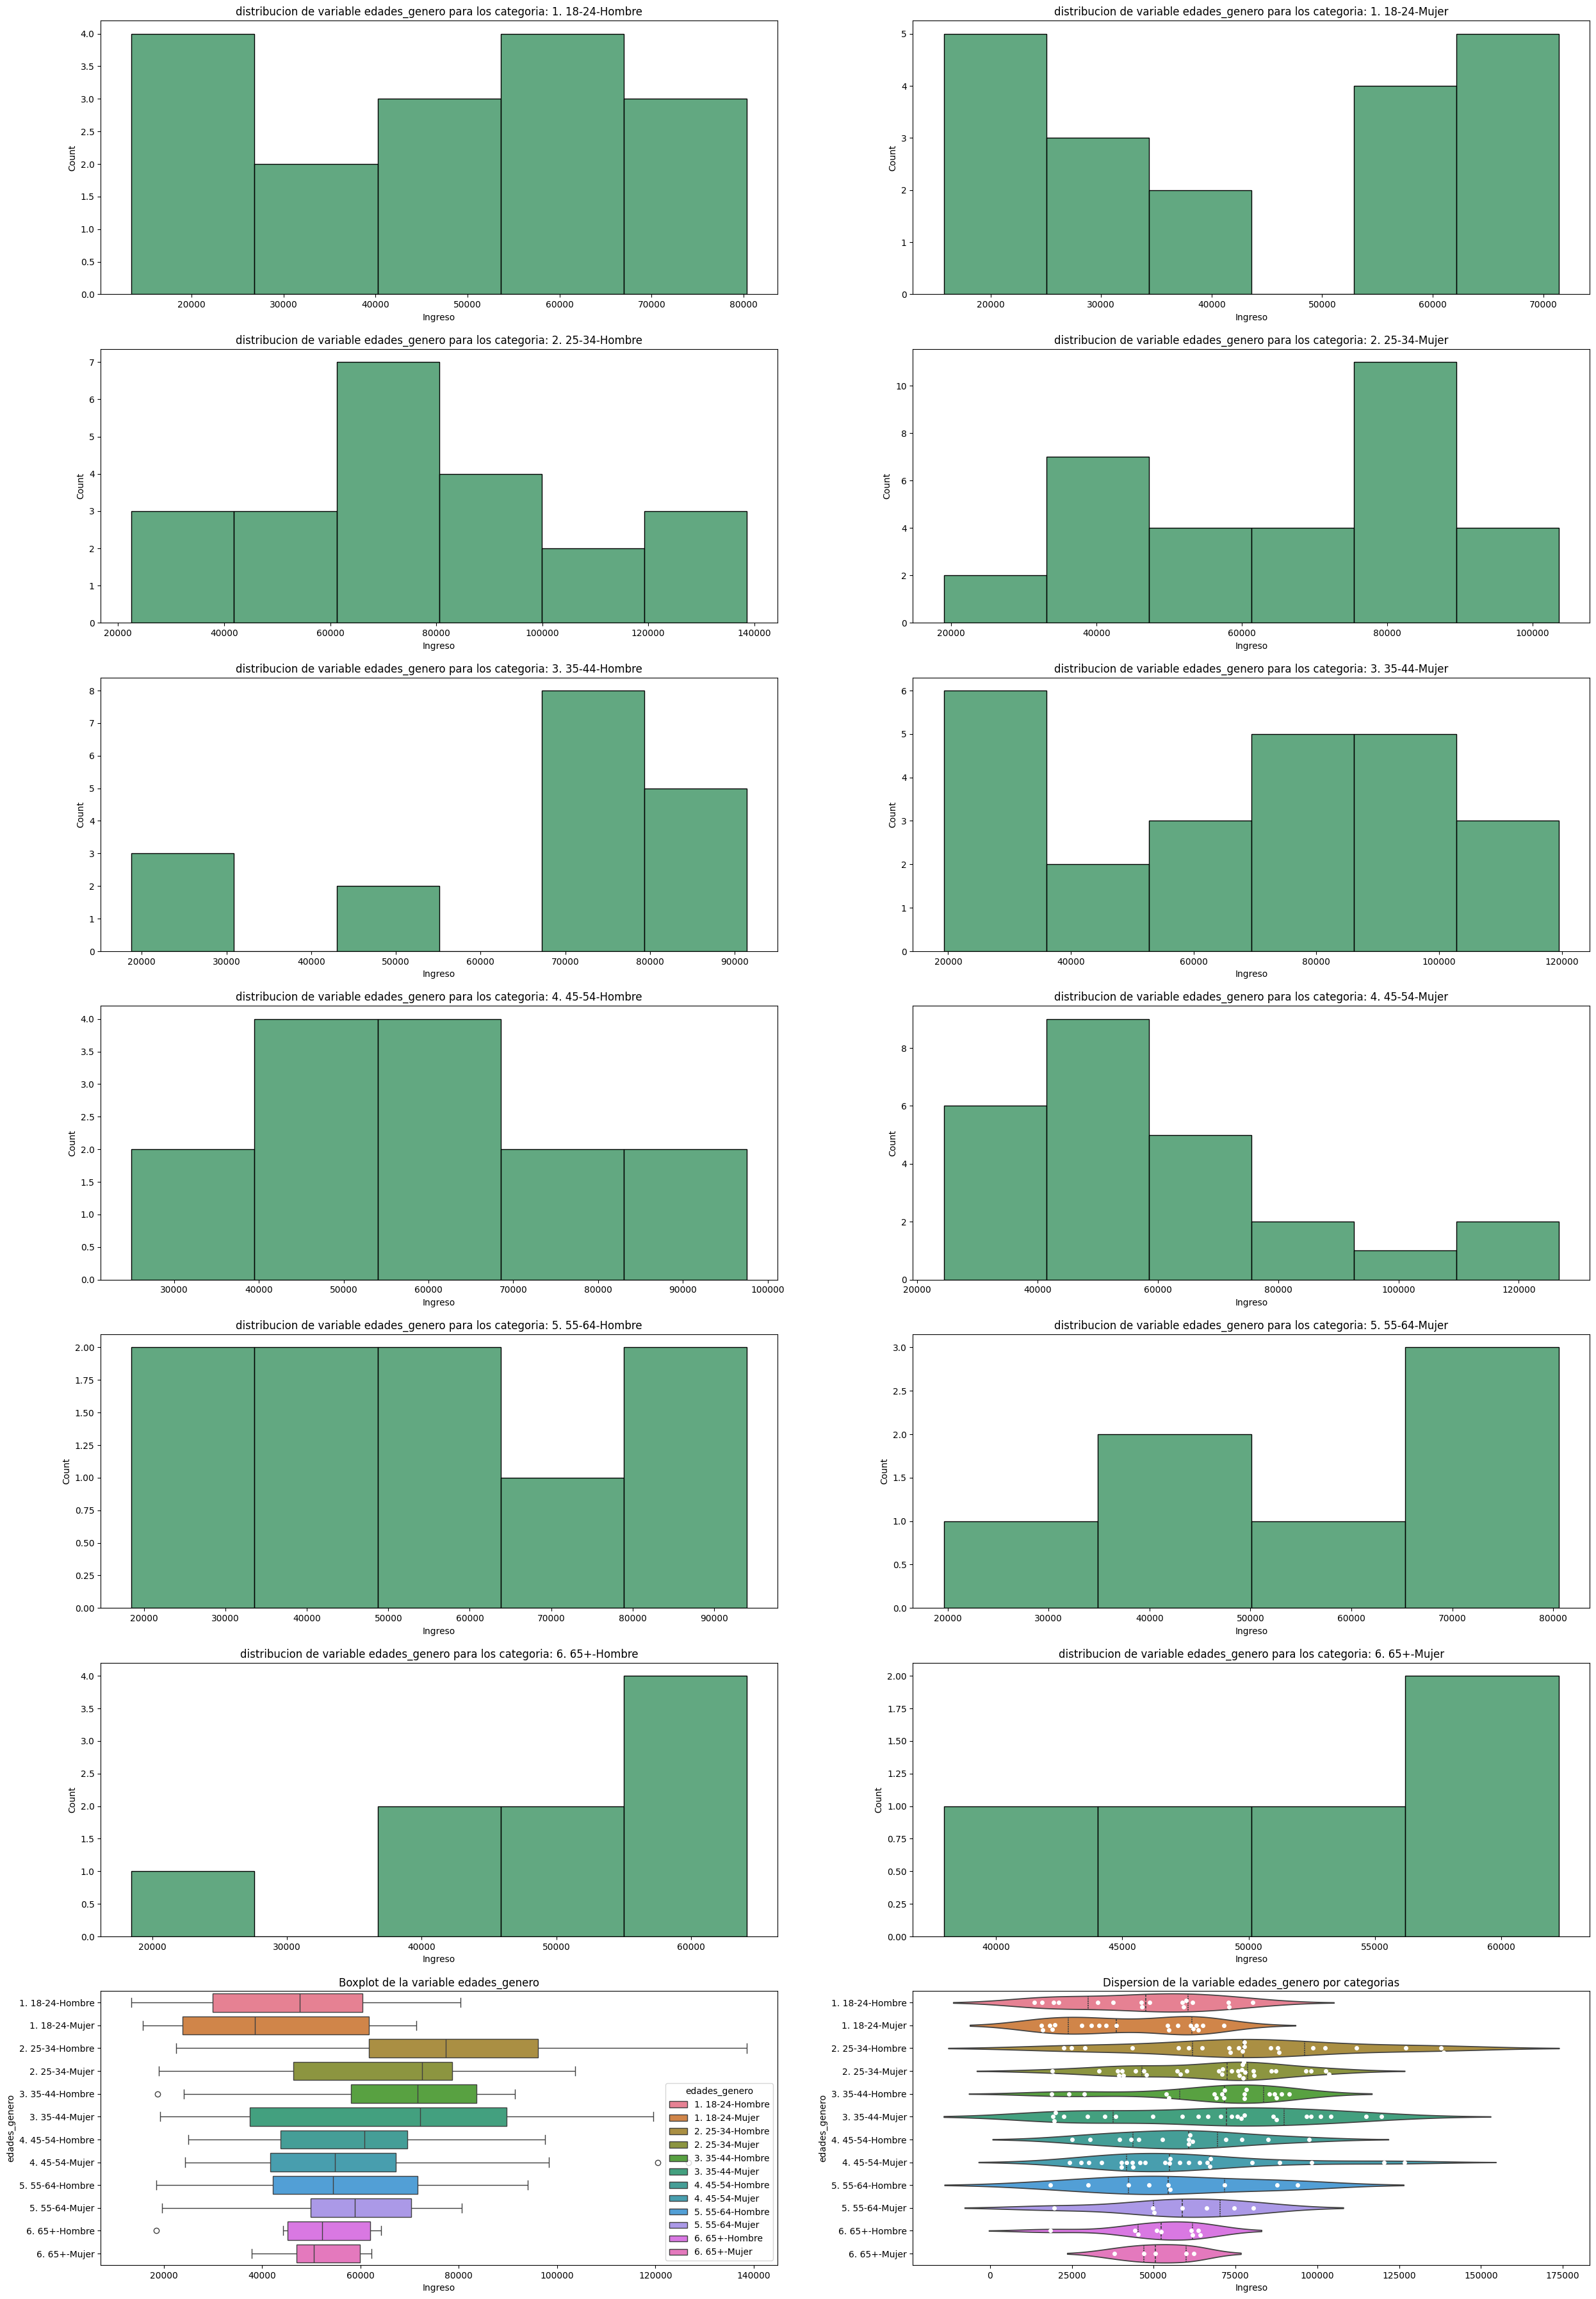

In [18]:
describe_variables(df_datos,variable="Ingreso", grupo="edades_genero")

Al desglosar las variables en estas nuevas categorias de genero con edad, se ve que las conclusion incial en donde las mujeres tienden a tener un gasto mas alto no es verdad para todos los rangos de edad, en alguos casos se presenta el caso inverso. Esto nos muestra que para capturar o describir de mejor manera el comportamiento de los clientes seria necesario tener en cuenta estas dos variables al mismo tiempo ya que la nueva dimension permite extraer informacion valiosa para cada grupo formado 

##### Relacion entre variables: Rango Edades, Genero y Puntaje Gasto

Puntaje_Gasto                                                  \
                        count       mean        std   min    25%   50%    75%   
edades_genero                                                                   
1. 18-24-Hombre          16.0  51.875000  27.796583   5.0  40.50  53.5  69.25   
1. 18-24-Mujer           19.0  59.947368  21.754881   6.0  49.00  57.0  76.50   
2. 25-34-Hombre          22.0  62.454545  28.468407   1.0  55.25  71.0  80.25   
2. 25-34-Mujer           32.0  63.656250  21.413908  22.0  45.75  70.0  83.75   
3. 35-44-Hombre          18.0  50.777778  33.502512   1.0  17.75  51.5  84.75   
3. 35-44-Mujer           24.0  48.416667  29.120315   6.0  26.75  40.0  75.25   
4. 45-54-Hombre          14.0  34.357143  15.775381   4.0  26.75  38.5  46.00   
4. 45-54-Mujer           25.0  37.280000  16.754402   5.0  24.00  43.0  50.00   
5. 55-64-Hombre           9.0  28.444444  23.173860   3.0  11.00  15.0  51.00   
5. 55-64-Mujer            7.0  37.285714  20.385569   5.0  25.00  43.0  52.50   
6. 65+-Hombre             9.0  46.000000  13.453624  14.0  43.00  48.0  55.00   
6. 65+-Mujer              5.0  48.000000   7.713624  35.0  48.00  50.0  52.00   

                       
                  max  
edades_genero          
1. 18-24-Hombre  92.0  
1. 18-24-Mujer   94.0  
2. 25-34-Hombre  97.0  
2. 25-34-Mujer   95.0  
3. 35-44-Hombre  95.0  
3. 35-44-Mujer   99.0  
4. 45-54-Hombre  56.0  
4. 45-54-Mujer   59.0  
5. 55-64-Hombre  60.0  
5. 55-64-Mujer   58.0  
6. 65+-Hombre    59.0  
6. 65+-Mujer     55.0

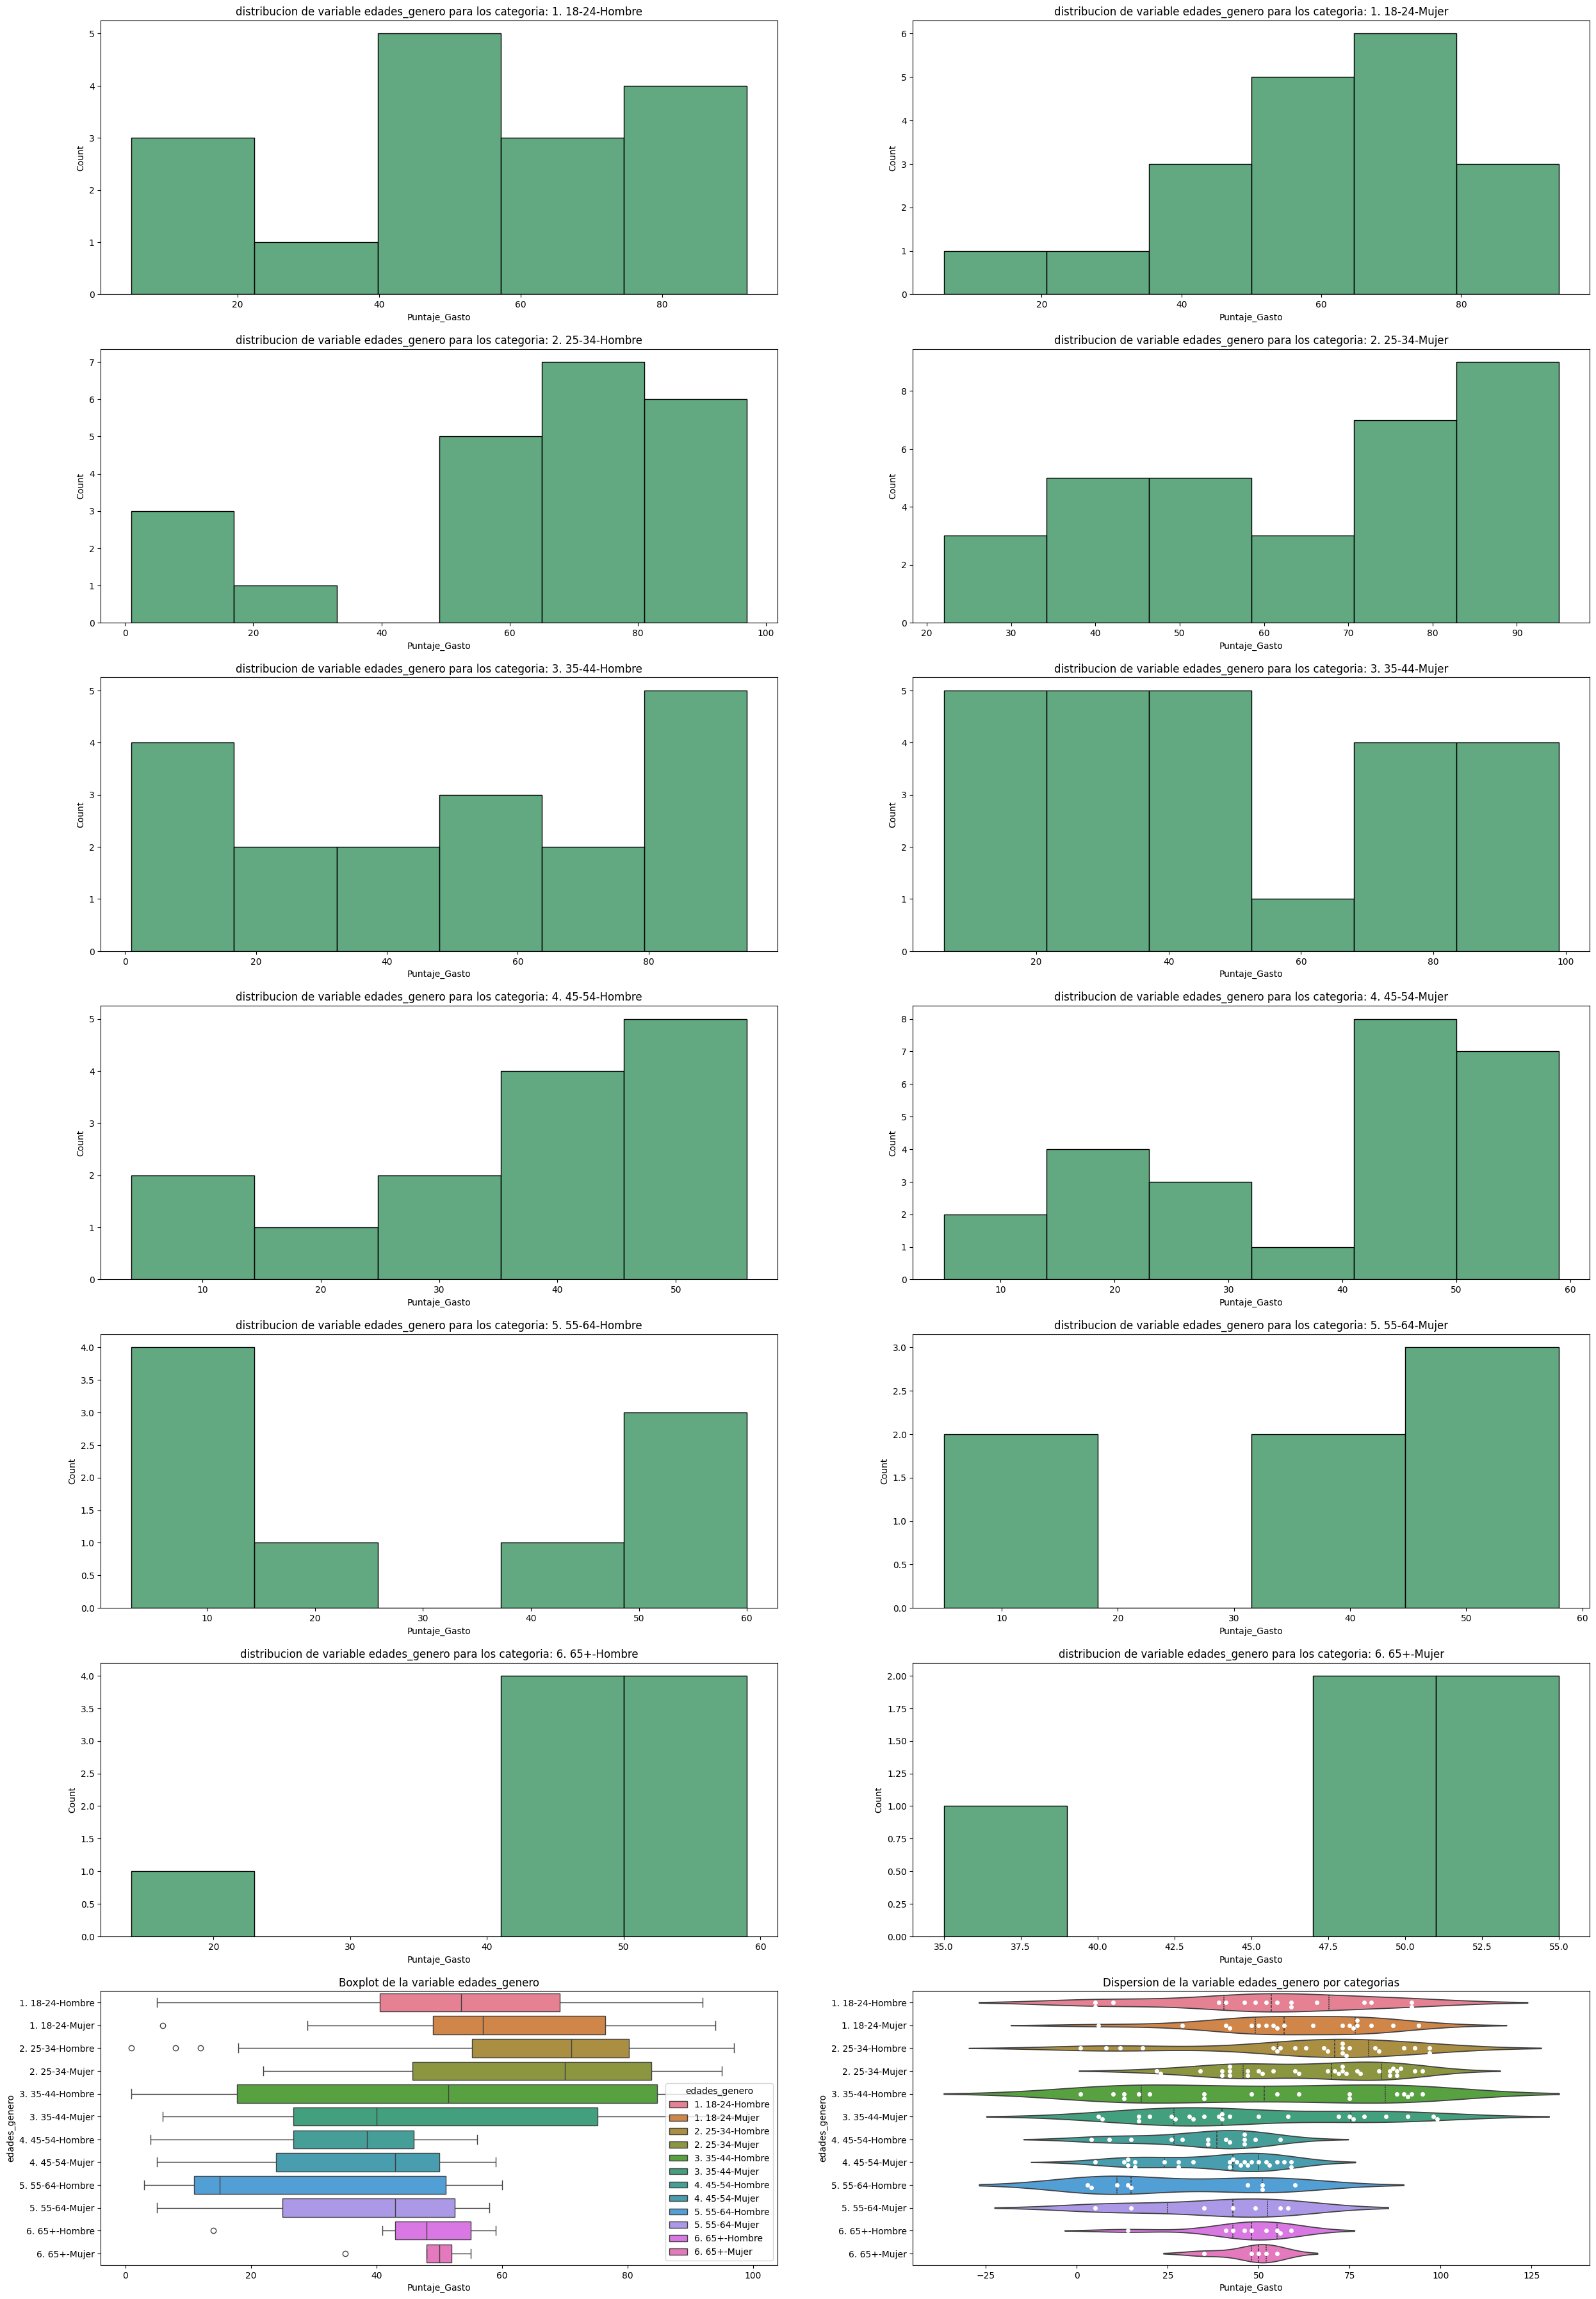

In [19]:
describe_variables(df_datos,"Puntaje_Gasto",grupo="edades_genero")

En estas variables el comportamiento de gasto se mantiene similar entre hombres y mujeres para las edades menores a 34 años, sin embargo para edades mas altas se ve una clara diferencia en los gastos promedio de los hombres y las mujeres, por ejemplo el rango de 35-44 y 55-64 (el mas alto). Asi como en el analisis anterior se ve que relacionar estas dos variables permite tener un mejor entendimiento de gurpos particulares, que estan por fuera del comportamiento incialmente identificado anteriormente.

##### Dispecion de puntos observando la relacion de ingresos y gastos

A continuacion se realizan distintas graficas de dispersion de puntos, en donde el eje **X** es el ingreso y el eje **Y** es el puntaje del gasto, esto con el fin de ver el comportamiento de los datos. Luego se mostrara la misma gráfica solo que añadiendo un color para las categorias de las variables (Genero, Rango Ingreso y la combinacion de estas dos), esto con el fin de identificar si existen grupos formados de forma natural.

Text(0.5, 1.0, 'dispercion de datos con combinacion de genero y rango edad')

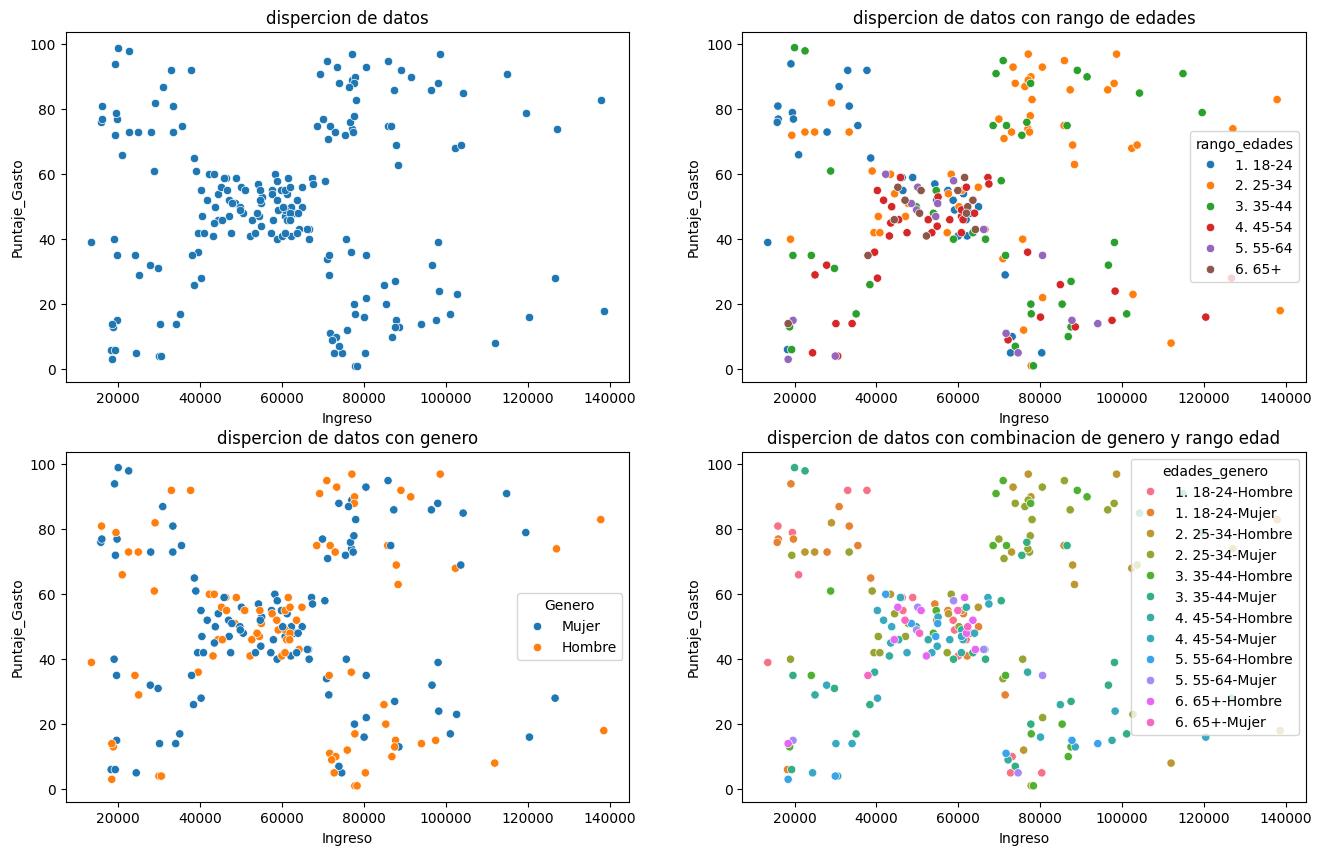

In [20]:
n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*5))
axs = ax.flatten()

sns.scatterplot(data=df_datos, x="Ingreso",y="Puntaje_Gasto",ax=axs[0])
axs[0].set_title("dispercion de datos")
sns.scatterplot(data=df_datos.sort_values(by="rango_edades"), x="Ingreso",y="Puntaje_Gasto",hue="rango_edades",ax=axs[1])
axs[1].set_title("dispercion de datos con rango de edades")
sns.scatterplot(data=df_datos, x="Ingreso",y="Puntaje_Gasto",hue="Genero",ax=axs[2])
axs[2].set_title("dispercion de datos con genero")
sns.scatterplot(data=df_datos.sort_values("edades_genero"), x="Ingreso",y="Puntaje_Gasto",hue="edades_genero",ax=axs[3])
axs[3].set_title("dispercion de datos con combinacion de genero y rango edad")

en las graficas anteriores se observan lo que pueden ser 5 grupos, hay una concentracion de puntos en cada cuadrante y adicional hay otra en el centro de la gráfica. A cada uno de estos grupos se le podria asignar unas caracteristicas:

* grupo central: personas con ingresos promedio y con un gasto promedio
* grupo superior derecho: personas con un alto ingreso y alto gasto
* grupo superior izquiedo: personas con un alto gasto e ingresos bajos
* grupo inferior derecho: personas con alto ingreso y bajo gasto
* grupo inferior izquierdo: personas con bajo ingreso y bajo gasto

Cuando se observa como esta localizado el genero en la grafica de dispersion a simple vista no se ve una relación entre el genero y alguno de los cuadrantes identificados antes. Sin embargo para la variable de rango edad se ven unos patrones. En los cuadrantes superiores (alto gasto) se ve una concentracio mas alta de los rangos de edad 18-24, 25-34, 35-44, esto quiere decir que en esta tienda estos rangos de edad son los que realizan un mayor gasto. La diferencia entre los rangos de edad radica en los ingresos que tiene cada rango, en el caso de 18-24 la mayoria se encuentra en ingreso bajo, mientras que los de 35-44 estan en un ingreso alto. El rango de 25-34 se encuentra en ambos rangos de ingreso con una mayor tendencia a estan en los valores altos.

### 3. Clustering Jerárquico

#### 3.1. Dendrogramas

Agrupe a los clientes utilizando sólo dos variables: su ingreso y el puntaje de gastos. Para ello retenga estas dos variables, estandarízelas, construya y grafique un dendograma. Para la construcción del dendrograma utilice el enlace 'ward' y la distancia euclidiana. Explique la importancia de estandarizar los datos.

In [21]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from sklearn.preprocessing import StandardScaler

In [22]:
# Escalado de datos
scaler = StandardScaler()
df_datos_scaled = pd.DataFrame(scaler.fit_transform(df_datos[["Ingreso","Puntaje_Gasto"]]))

# Validacion del resultado
df_datos_scaled.describe()

,0,1
count,2.000000e+02,2.000000e+02
mean,-1.243450e-16,-1.021405e-16
std,1.002509e+00,1.002509e+00
min,-1.800440e+00,-1.910021e+00
25%,-7.295316e-01,-5.997931e-01
50%,5.859924e-03,-7.764312e-03
75%,6.305804e-01,8.851316e-01
max,2.975897e+00,1.894492e+00


Los datos se escalan para que la magnitud de los mismos no tenga influencia en las distancias calculadas por los distintos métodos de clusterizacion que serán aplicados. Ya que si una variable esta en el rango de millones y otra en el rango de centenas, las diferencias entre los valores de una variable se veran "opacadas" por la magnitud de la otra variable

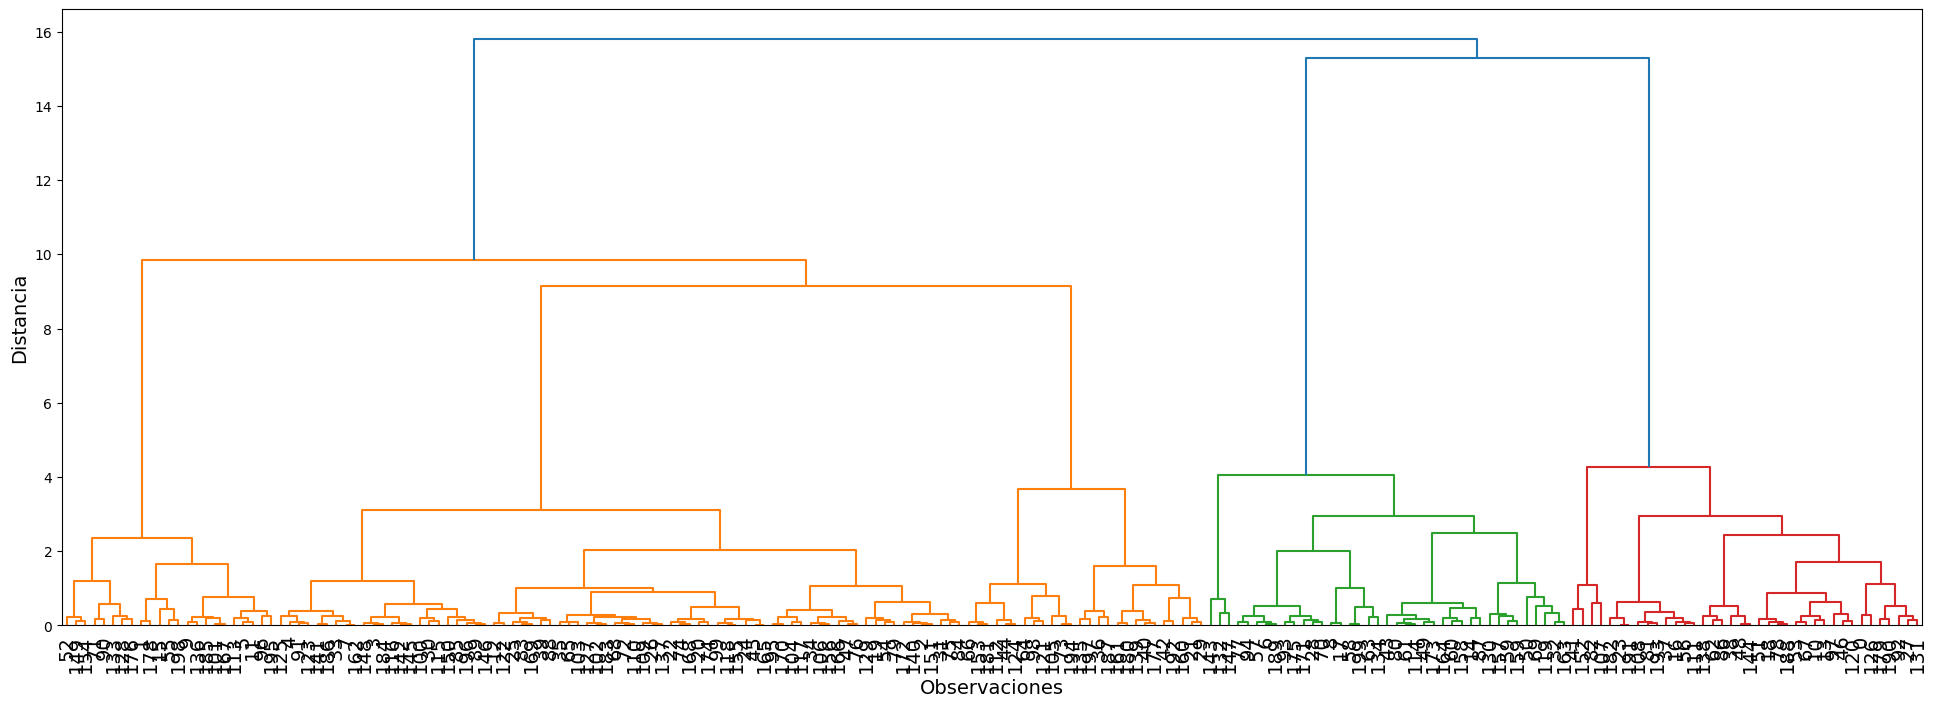

In [23]:
from scipy.cluster.hierarchy import dendrogram

# calculo de distancias entre los datos
dist = pdist(df_datos_scaled, metric='euclidean')
Z = linkage(dist, method='ward')

# Graficar el dendograma
fig, ax = plt.subplots(figsize=(24, 8))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=14, ax=ax)
ax.set_xlabel('Observaciones', fontsize=14)
ax.set_ylabel('Distancia', fontsize=14)
plt.show()

Luego de estandarizar los datos, se calculan las distancias entre todos los puntos por medio de la distancia euclidiana

$$
d_{ii'} = d(x_i, x_{i'}) = \sqrt{(x_i - x_{i'})^2}
$$

luego se realiza la asociacion entre puntos para encontrar clusters aplicando el criterio de **ward** el cual busca minimizar la varianza intra cluster con cada nueva union de puntos a un cluster.

El resultado de cada una de estas asociaciones se muestra en el dendograma anterior

#### 3.2. Número de clusters

Retenga el número de clusters que se obtengan luego de fijar la distancia en 6.

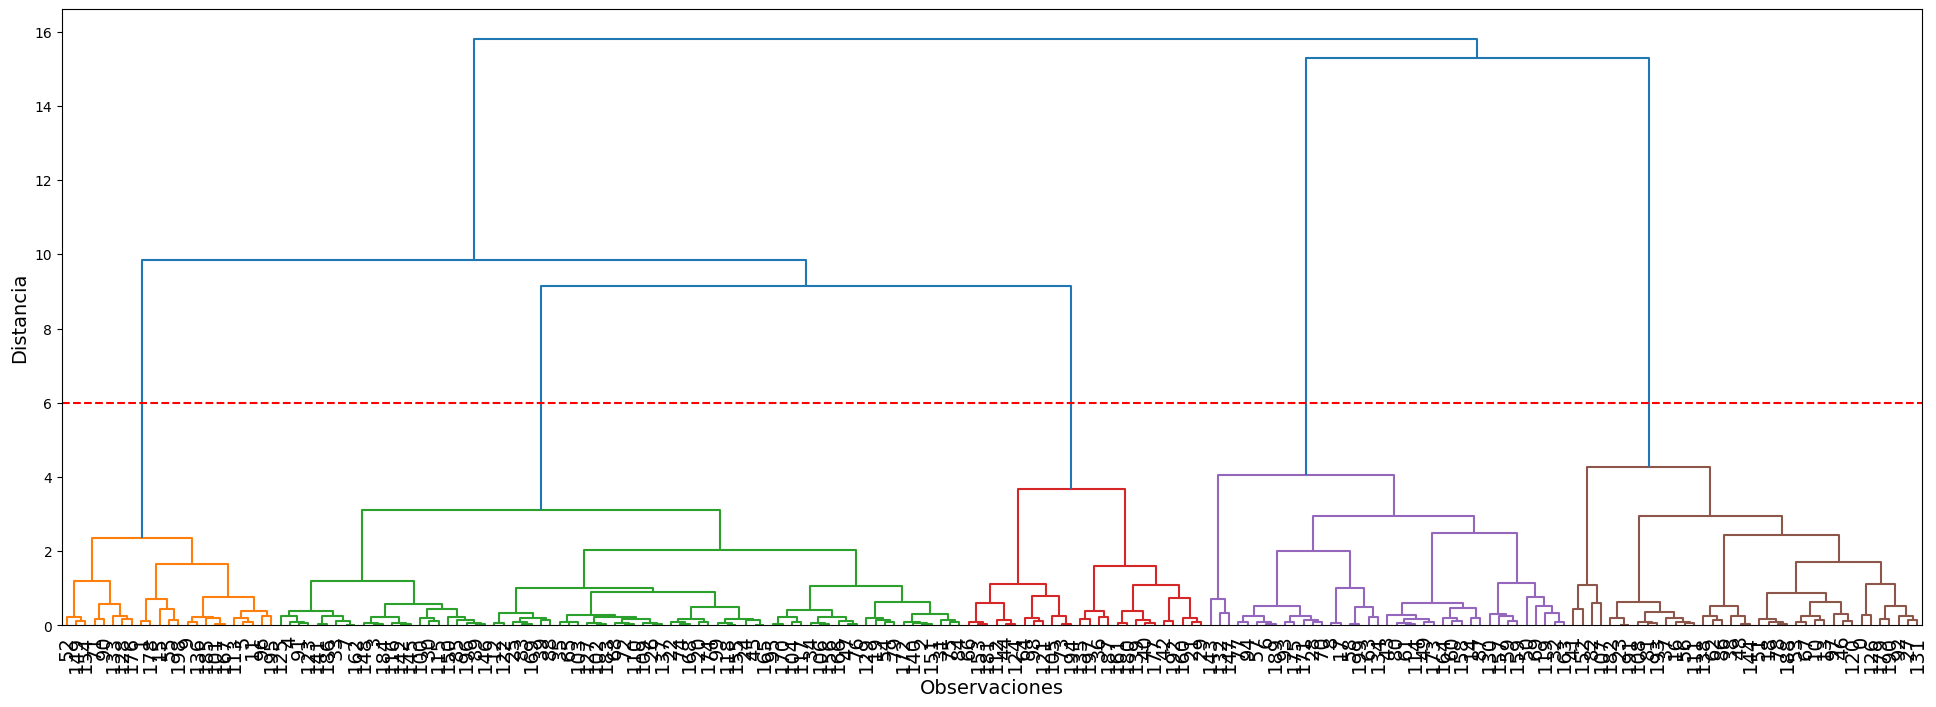

In [24]:
# asignacion de valor de distancia
distancia = 6

fig, ax = plt.subplots(figsize=(24, 8))
# generar el nuevo dendograma teniendo en cuenta la distancia definida anteriormente
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=14, ax=ax,color_threshold=distancia)
ax.axhline(y=distancia, color='r', linestyle='--', label="Distnacia fija en = {d}".format(d=distancia))
ax.set_xlabel('Observaciones', fontsize=14)
ax.set_ylabel('Distancia', fontsize=14)
plt.show()

In [25]:
# se resta uno ya que es el color default de los niveles mas altos a la distancia (color azul)
n_clusters = max(len(set(d["color_list"])) - 1, 1)
print("numero de clusters con la distancia {d}: {c}".format(d=distancia,c=n_clusters))


numero de clusters con la distancia 6: 5


en este caso al definir la distancia para separar clusters como **6** se encuentran **5** clusters, esto se ve de forma grafica al trazar una linea horizontal en el valor 6 y contar cuantas intersecciones existen con las lineas verticales, que representan la magnitud de la distancia entre cada grupo generado, al contar las intersecciones vemos que llegamos al mismo valor de **5**

#### 3.3. Algoritmo Jerárquico Aglomerativo

Utilizando el número de clusters encontrados en el paso anterior, aplique el algoritmo jerárquico aglomerativo, utilizando el enlace 'ward' y la distancia euclidiana. Describa los grupos encontrados, en que grupo o grupos concentraría su estrategia de marketing y por qué?

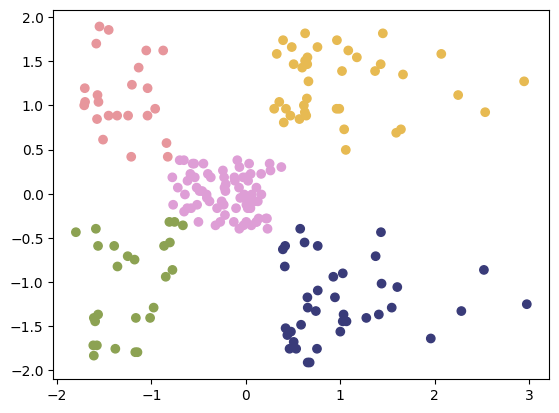

In [27]:
from sklearn.cluster import AgglomerativeClustering

X = df_datos_scaled


cluster_sk = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
#Nota para quiene esten usando la versión 1.4., la opción affinity fue renombrada a metric
cluster_sk = cluster_sk.fit_predict(X)

plt.scatter(X.iloc[:,0], X.iloc[:,1], c=cluster_sk, cmap='tab20b')
plt.show()


como se evidencia en el analisis descriptivo de las variables se observan 5 grupos, los cuales pueden describirse de la siguiente manera:

* grupo central: personas con ingresos promedio y con un gasto promedio
* grupo superior derecho: personas con un alto ingreso y alto gasto
* grupo superior izquiedo: personas con un alto gasto e ingresos bajos
* grupo inferior derecho: personas con alto ingreso y bajo gasto
* grupo inferior izquierdo: personas con bajo ingreso y bajo gasto


respecto a estos grupos como se concentraria una estrategia de marketing es complicado definir estrategias sin concer la naturaleza de la tienda que se esta analizando pero a continuacion hay algunas ideas.

* grupo central: se pueden trabajar estrategias de profundizacion de clientes, analizando que categorias de productos son las de mayor gasto, asi se puede incentivar a los clientes para que consuman mas de la tienda

* grupo superior derecho: es el grupo ideal ya que se tienen altos ingresos y realizan alto gasto, por lo que no habria que incentivar el gasto, sin embargo se han de monitorear estos clientes para identificar posibles desplazamiento de estos clientes a otros cluster, si esto se presenta se debe pensar en estrategias de conservacion.

* grupo superior izquierdo: son clientes que si bien estan gastando alto, tienen ingresos bajos. a estos para conservarlos en gasto alto podrian hacerle comunicaciones para que aprovechen descuentos o promociones en la tienda

* grupo inferior derecho: son clientes con alto ingreso y alto costo, a estos deberia incentivarse el gasto, quiza con el mismo tratamiento del grupo anterior comunicaciones para aprovechar descuentos o promociones

* grupo inferior izquierdo: este grupo es el mas complicado ya que no cuentan con la capacidad para ahorrar. para conservarlos podrian ofrecerse programas de fidelizacion para que no sigan disminuyendo su consumo

### 4. DBSCAN

Implemente DBSCAN, al igual que el punto anterior sólo dos variables: su ingreso y el puntaje de gastos. Al implementar  justifique su elección de `min_samples` y `eps`. ¿Cuántos grupos o clusters encuentra? ¿Cuáles son su características? ¿Cambiaría su estrategia de marketing respecto al punto anterior? Justifique su respuesta.

In [28]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

X = df_datos_scaled

# neigh = NearestNeighbors(n_neighbors = 10)
# nbrs = neigh.fit(X)
# distancias, indices = nbrs.kneighbors(X)
# distancias = np.sort(distancias.flatten())

# # encontrar el punto con una alta inflexion
# i = np.arange(len(distancias))
# knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
# optimo = distancias[knee.knee]

# fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
# plt.axhline(y = optimo, color = 'r', linestyle = '--', label="punto optimo {}".format(optimo))
# plt.plot(distancias)
# plt.legend()

In [29]:
def find_knee_points(data, n_neighbors_list, metric='minkowski', graficar=True):
    '''
    funcion que se utiliza para encontrar el punto de maxima inflexion en la curva generada por las distnacias entre puntos, 
    para calcular las distnacias se vale del algoritmo de NearestNeighbors que tiene como parametro de entrada los numeros de vecinos

    devuelve una lista con los valores de inflexion maximos para los n_vecinos de entrada

    parametros:
    data: dataframe con los datos para encontrar las distancias
    n_neighbors: numero de vecinos para el algoritmo de NearesNeighbors
    metric: parametro para el algoritmo de NearesNeighbors, dictamina la funcion que se usará para calcular las distancias
    grafica: booleano que indica si se deben mostrar las graficas de las curvas y puntos de inflexio máximos ingresados como parámetros

    '''
    
    # array de retorno
    knee_values = []
    
    # Definir una lista de colores usando la paleta "tab10"
    colors = plt.cm.tab10(np.linspace(0, 1, len(n_neighbors_list)))
    
    if graficar:
        plt.figure(figsize=(10, 6), dpi=100)
    
    # iterar sibre cada cantidad de vecinos
    for idx, n in enumerate(n_neighbors_list):
        # Crear el modelo de vecinos más cercanos
        neigh = NearestNeighbors(n_neighbors=n, metric=metric)
        nbrs = neigh.fit(data)
        # asignacion de distancias calculadas por el algoritmo de Neighbors
        distancias, indices = nbrs.kneighbors(data)
        distancias = np.sort(distancias.flatten())
        
        # LLamado a metodo para encontrar el punto de inflexion maximo
        i = np.arange(len(distancias))
        knee_locator = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
        
        # Verificar si se encontró un punto de rodilla
        if knee_locator.knee is not None:
            knee_value = distancias[knee_locator.knee]
        else:
            # En caso de que no se encuentre un punto de rodilla
            knee_value = np.nan  
        
        knee_values.append(knee_value)
        

        if graficar:
            # Obtener un color para la línea
            color = colors[idx]
            
            plt.plot(distancias, label=f'n_neighbors = {n}', color=color)
            if not np.isnan(knee_value):
                plt.axhline(y=knee_value, color=color, linestyle='--', label=f'Knee at {n} = {knee_value:.2f}')

    
    if graficar:
        plt.xlabel('Data Points')
        plt.ylabel('Distance')
        plt.title('Knee Point Analysis for Different n_neighbors')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

    return np.array(knee_values)

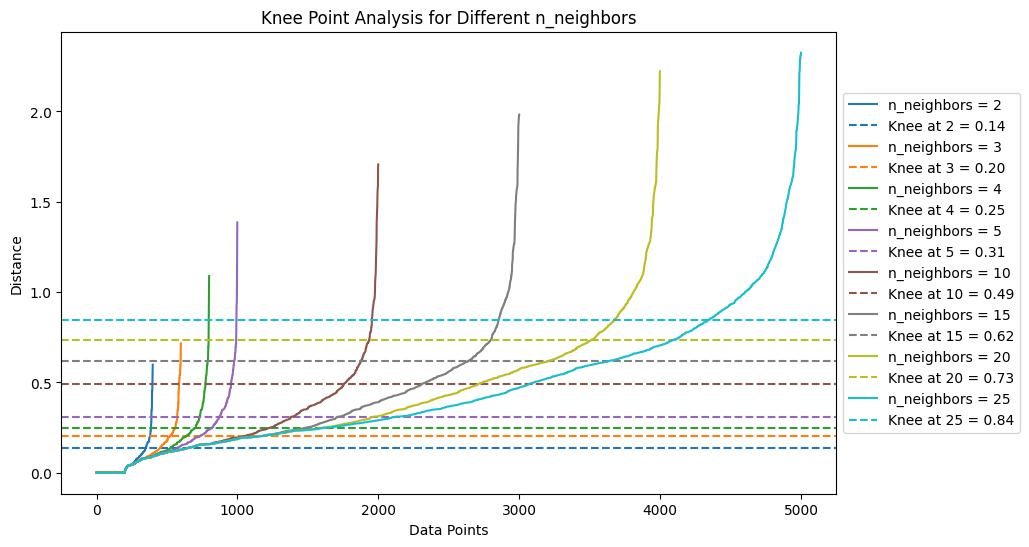

In [30]:
n_neighbors_list = [2, 3, 4, 5, 10, 15, 20, 25]  

limite_sup = int(np.ceil(len(X)/4)) 
#n_neighbors_list = np.arange(2,limite_sup,1)
epsilon_list = find_knee_points(X, n_neighbors_list)
neighbors_epsilon=pd.DataFrame({'n_neighbors':n_neighbors_list, 'epsilon':epsilon_list})

In [31]:
limite_sup = int(np.ceil(len(X)/4)) 
limite_sup = 15
n_neighbors_list = np.arange(2,limite_sup,1)
epsilon_list = find_knee_points(X, n_neighbors_list,graficar=False)
neighbors_epsilon=pd.DataFrame({'n_neighbors':n_neighbors_list, 'epsilon':epsilon_list})
#neighbors_epsilon
neighbors_epsilon

,n_neighbors,epsilon
0,2,0.138260
1,3,0.203458
2,4,0.246229
3,5,0.310153
4,6,0.351759
5,7,0.388261
6,8,0.420453
7,9,0.457896
8,10,0.493497
9,11,0.524894


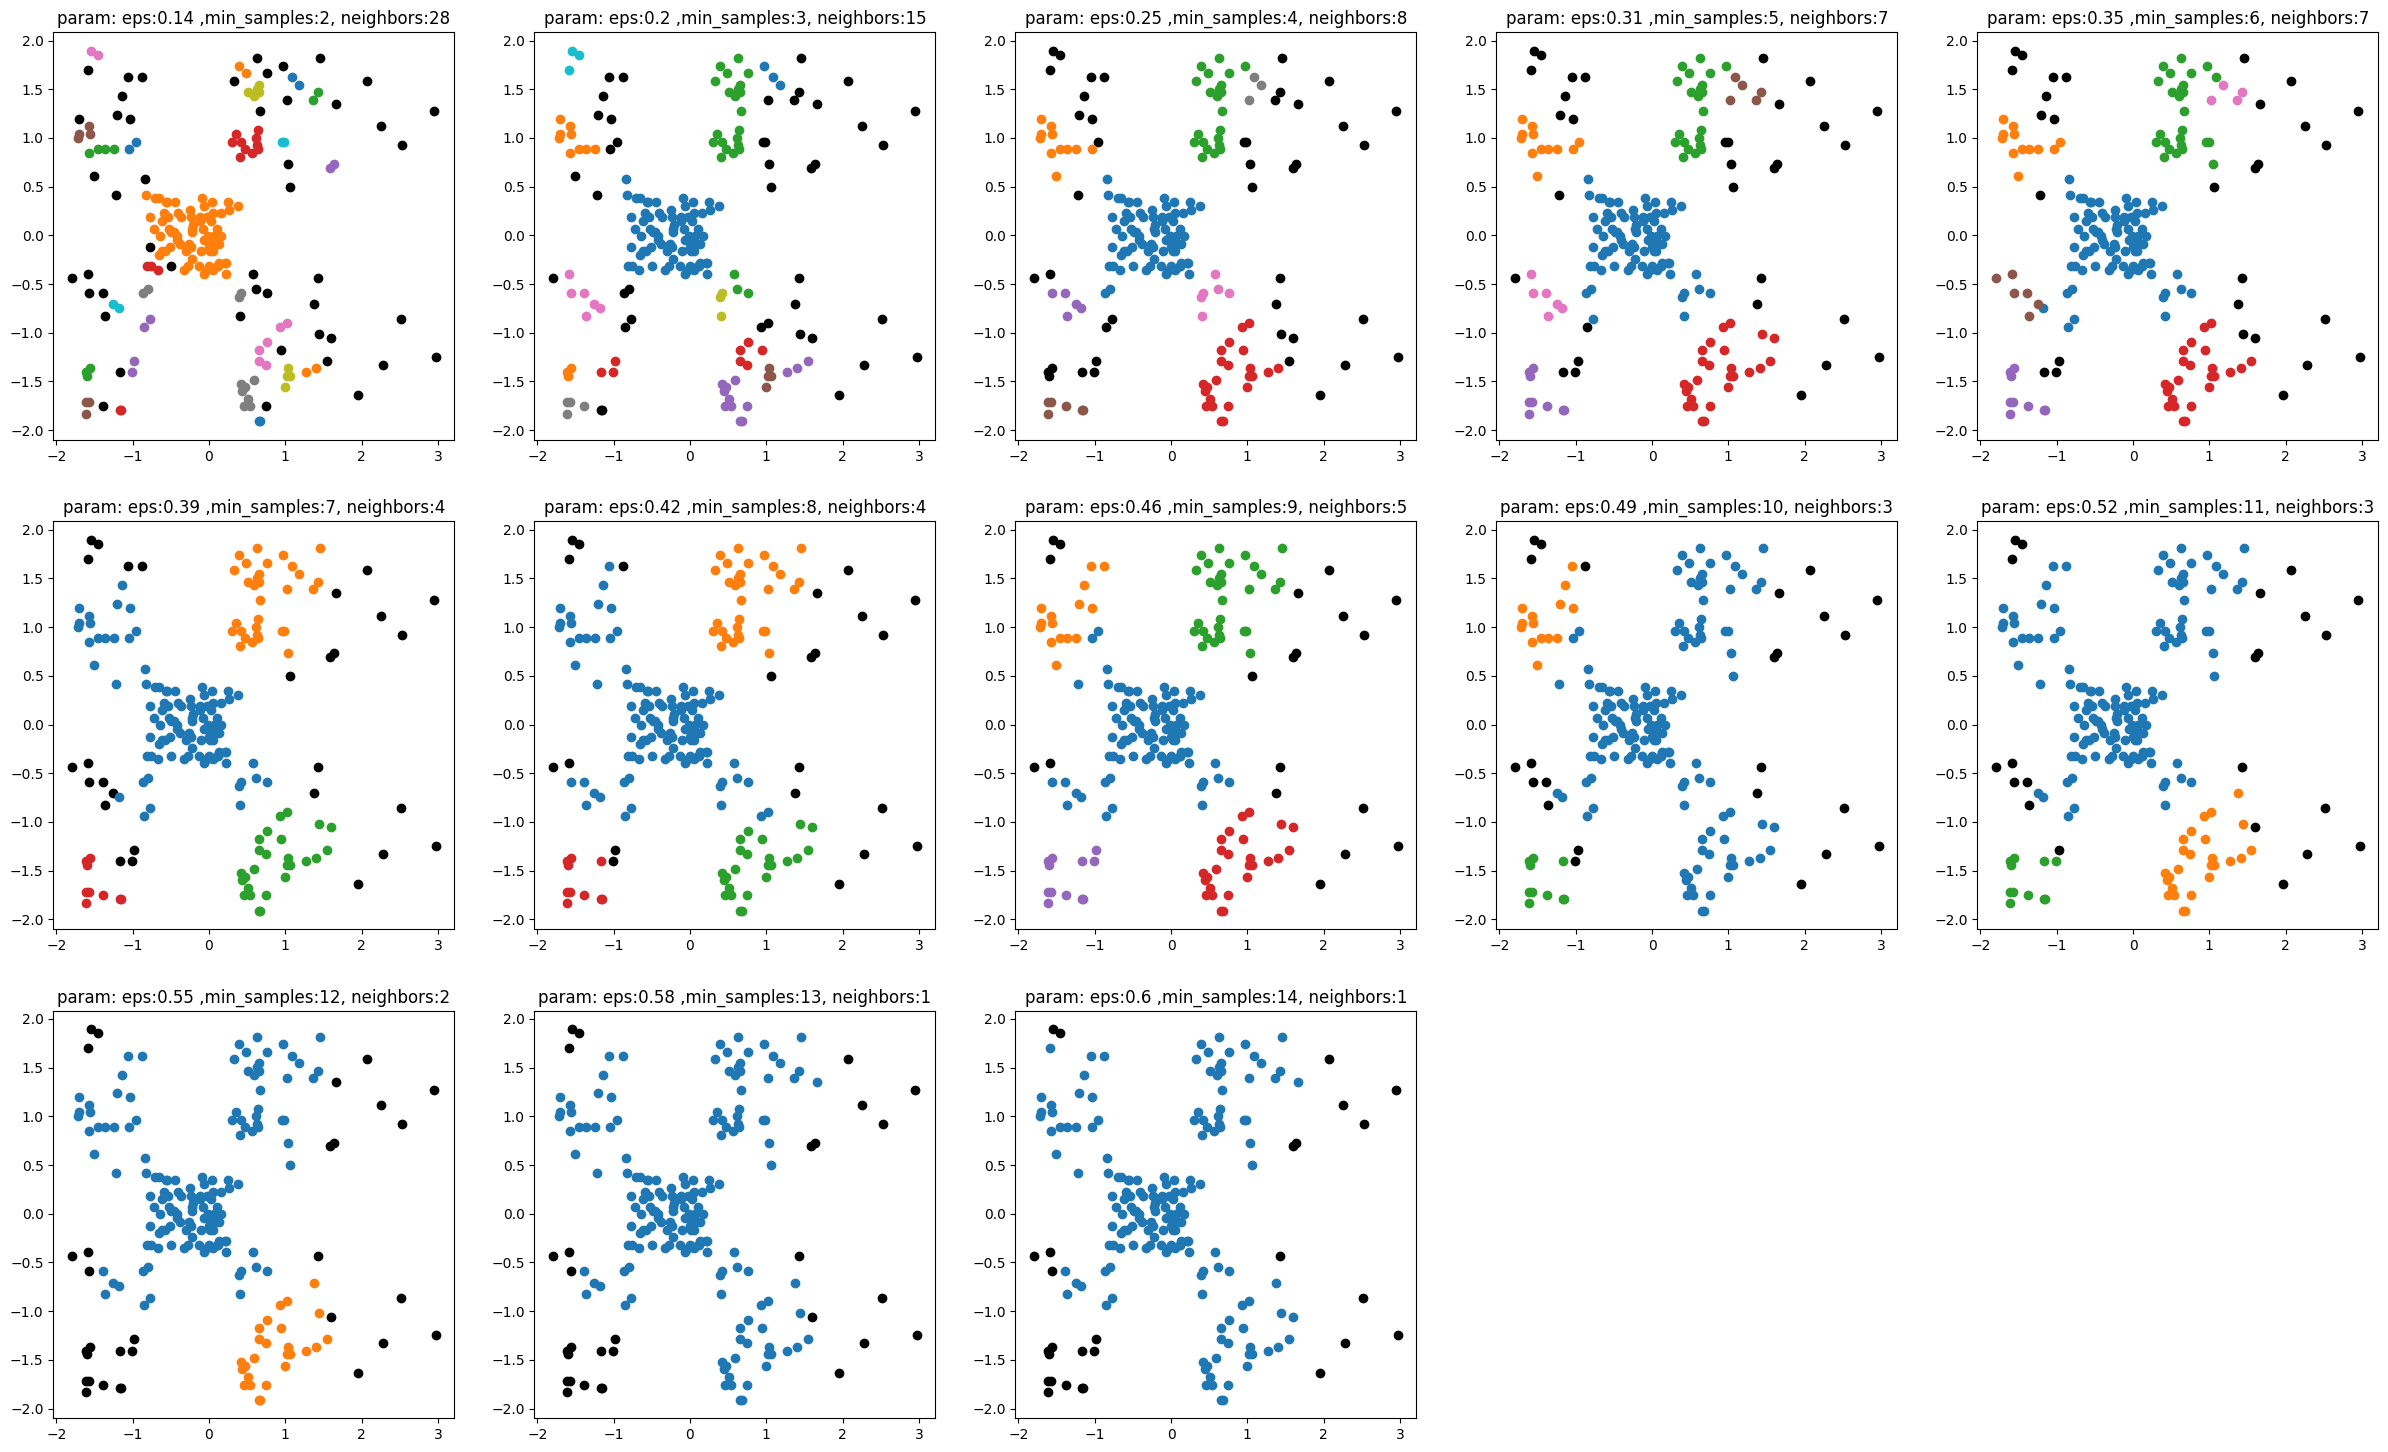

In [32]:
from sklearn.cluster import DBSCAN

n_cols = 5
n_rows = int(np.ceil(len(n_neighbors_list)/n_cols))


fig, ax = plt.subplots(n_rows, n_cols,figsize=(n_cols*6,n_rows*6))
axs = ax.flatten()

for i,(eps,min_samples) in enumerate(zip(epsilon_list,n_neighbors_list)):

    db = DBSCAN(eps = eps, min_samples = min_samples).fit(X)
    clusteres = db.labels_
    n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
    resultado = pd.DataFrame(X).assign(Cluster = clusteres)
    
    for k in np.unique(clusteres):
        if k != -1:
            axs[i].scatter(
                x = resultado.loc[resultado.Cluster == k, 0], 
                y = resultado.loc[resultado.Cluster == k, 1]
                )
        else:
            axs[i].scatter(
                x = resultado.loc[resultado.Cluster == k, 0], 
                y = resultado.loc[resultado.Cluster == k, 1],
                c = "black"
                )
            
    axs[i].set_title("param: eps:{e} ,min_samples:{s}, neighbors:{n}".format(e=np.round(eps,2),s=min_samples,n=n_clusteres))
            

for j in range(i + 1, n_rows * n_cols):
    axs[j].axis('off')

In [33]:
type(epsilon_list)
#type(n_neighbors_list)

numpy.ndarray

In [34]:
idx_lst = np.where((n_neighbors_list >= 6) & (n_neighbors_list <= 10))[0]

print(idx_lst)

param1 = n_neighbors_list[idx_lst]
print(param1)
param2 = epsilon_list[idx_lst]
print(param2)

[4 5 6 7 8]
[ 6  7  8  9 10]
[0.35175921 0.38826124 0.42045334 0.45789564 0.49349683]


In [35]:
combinations = [(x, y) for x in param2 for y in param1]
combinations

[(0.3517592078443737, 6),
 (0.3517592078443737, 7),
 (0.3517592078443737, 8),
 (0.3517592078443737, 9),
 (0.3517592078443737, 10),
 (0.3882612400075475, 6),
 (0.3882612400075475, 7),
 (0.3882612400075475, 8),
 (0.3882612400075475, 9),
 (0.3882612400075475, 10),
 (0.4204533371397528, 6),
 (0.4204533371397528, 7),
 (0.4204533371397528, 8),
 (0.4204533371397528, 9),
 (0.4204533371397528, 10),
 (0.45789563720443555, 6),
 (0.45789563720443555, 7),
 (0.45789563720443555, 8),
 (0.45789563720443555, 9),
 (0.45789563720443555, 10),
 (0.4934968313866966, 6),
 (0.4934968313866966, 7),
 (0.4934968313866966, 8),
 (0.4934968313866966, 9),
 (0.4934968313866966, 10)]

In [36]:
from sklearn.metrics import silhouette_score

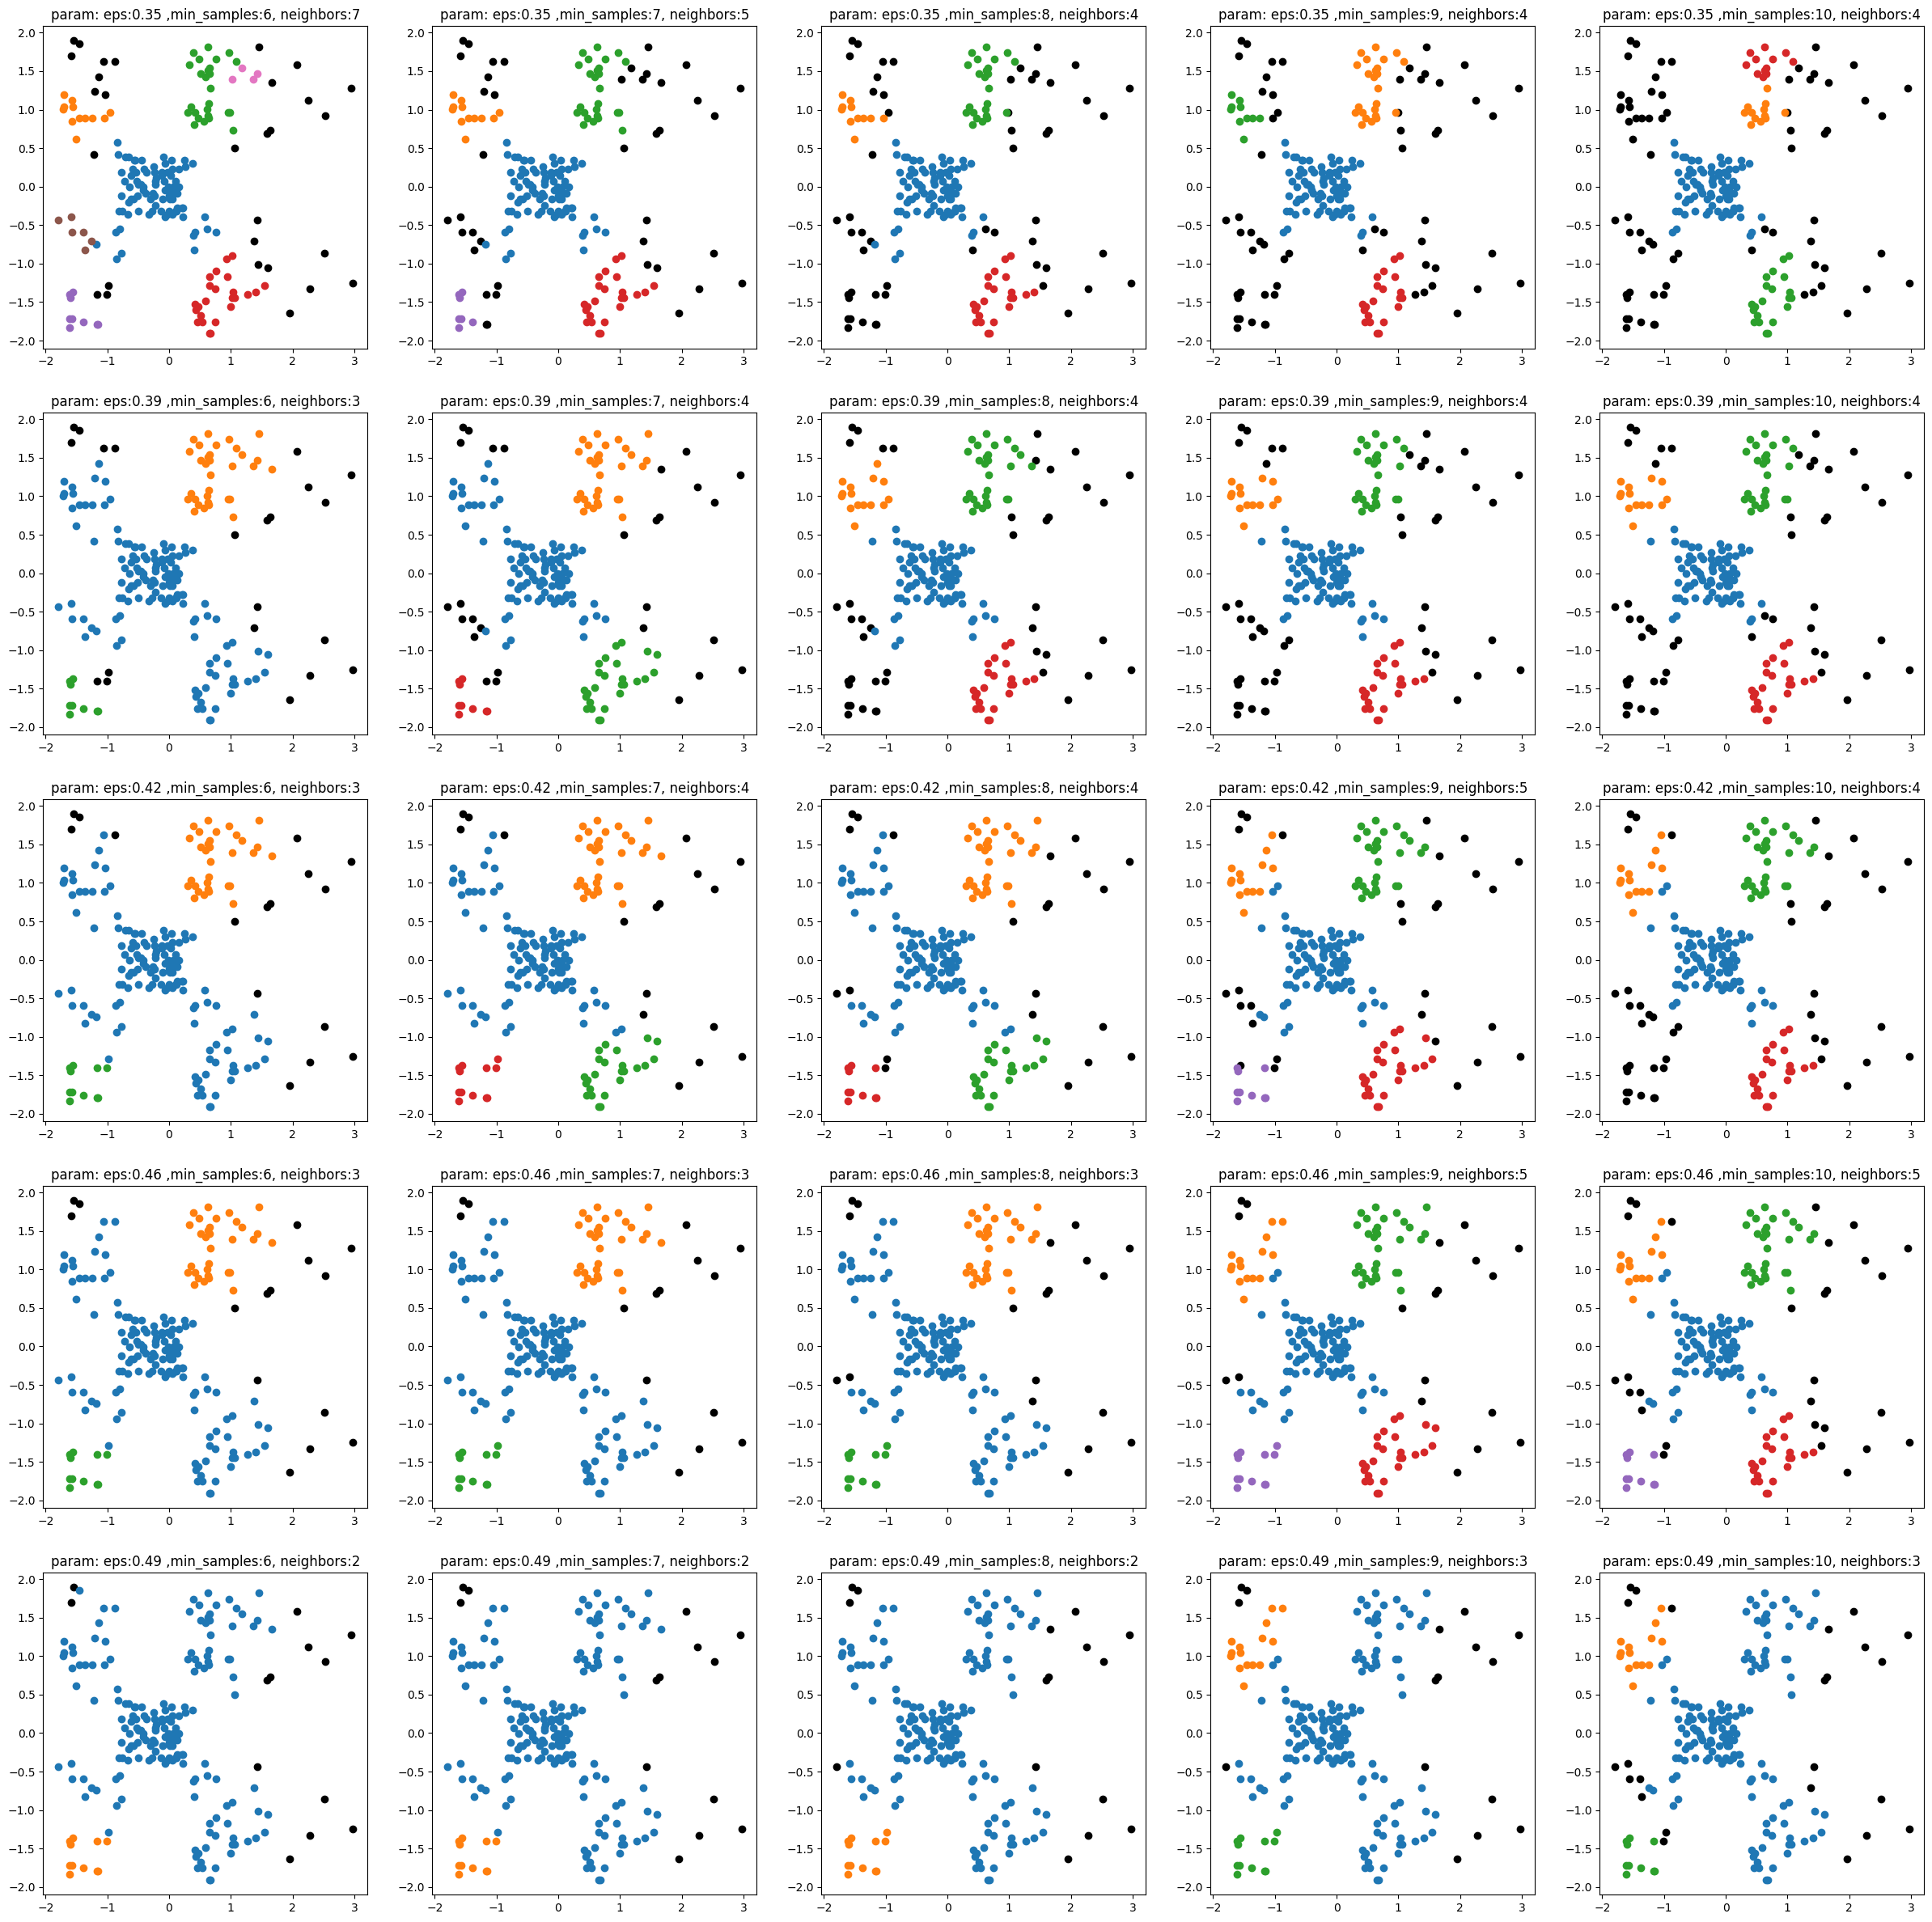

In [37]:
from sklearn.cluster import DBSCAN

arr_silhouettes = []

n_cols = 5
n_rows = int(np.ceil(len(combinations)/n_cols))


fig, ax = plt.subplots(n_rows, n_cols,figsize=(n_cols*6,n_rows*6))
axs = ax.flatten()

for i,(eps,min_samples) in enumerate(combinations):

    db = DBSCAN(eps = eps, min_samples = min_samples).fit(X)
    clusteres = db.labels_
    n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
    resultado = pd.DataFrame(X).assign(Cluster = clusteres)


    silhouette = silhouette_score(X, clusteres)
    arr_silhouettes.append(silhouette)
    
    for k in np.unique(clusteres):
        if k != -1:
            axs[i].scatter(
                x = resultado.loc[resultado.Cluster == k, 0], 
                y = resultado.loc[resultado.Cluster == k, 1]
                )
        else:
            axs[i].scatter(
                x = resultado.loc[resultado.Cluster == k, 0], 
                y = resultado.loc[resultado.Cluster == k, 1],
                c = "black"
                )
            
    axs[i].set_title("param: eps:{e} ,min_samples:{s}, neighbors:{n}".format(e=np.round(eps,2),s=min_samples,n=n_clusteres))
            

for j in range(i + 1, n_rows * n_cols):
    axs[j].axis('off')

In [38]:
combinations[np.argmax(arr_silhouettes)]

(0.45789563720443555, 9)

(Utilice este espacio para describir su procedimiento)

### 5. Incorporando más dimensiones

Hasta este momento hemos utilizado solo dos variables para nuestro análisis, sin embargo, la base cuenta con otras variables más: género y edad. Usando las categorías de edad creadas anteriormente incorpore género y grupo etario a su análisis. Genere los grupos utilizando DBSCAN y la distancia de Gower, justificando su elección de `min_samples` y `eps`   ¿Incorporar estas variables, ayuda a la focalización de la estrategia de marketing?

In [39]:
df_datos_scaled_categ = pd.concat([df_datos_scaled,df_datos[["Genero","rango_edades"]]], axis=1)

In [40]:
df_datos_scaled_categ.head()

,0,1,Genero,rango_edades
0,1.431094,-0.434801,Mujer,3. 35-44
1,-0.960650,0.962775,Mujer,1. 18-24
2,-0.028719,0.186343,Mujer,6. 65+
3,-0.462474,0.031057,Hombre,5. 55-64
4,-0.618133,0.147522,Mujer,2. 25-34


In [41]:
import gower 

distancias_gower = gower.gower_matrix(df_datos_scaled_categ)
pd.DataFrame(distancias_gower)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,0.467024,0.367225,0.629724,0.395525,0.733005,0.381504,0.654588,0.582437,0.503569,...,0.299865,0.386479,0.152487,0.637416,0.724295,0.491610,0.374453,0.408111,0.435238,0.114951
1,0.467024,0.000000,0.349799,0.587300,0.321499,0.526185,0.335520,0.312435,0.651502,0.036545,...,0.516888,0.774423,0.380864,0.503077,0.690945,0.289892,0.342571,0.624760,0.031786,0.352072
2,0.367225,0.349799,0.000000,0.532907,0.283402,0.615780,0.332659,0.537363,0.618029,0.386344,...,0.417090,0.674624,0.366894,0.653278,0.688703,0.374385,0.308248,0.622518,0.318013,0.354314
3,0.629724,0.587300,0.532907,0.000000,0.515800,0.353281,0.615567,0.274864,0.400937,0.623845,...,0.679589,0.437123,0.583987,0.415777,0.405795,0.611886,0.525341,0.339611,0.555514,0.637222
4,0.395525,0.321499,0.283402,0.515800,0.000000,0.337481,0.116061,0.516446,0.401431,0.358044,...,0.195389,0.702924,0.333493,0.681578,0.655301,0.096085,0.274847,0.589117,0.289713,0.387716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.491610,0.289892,0.374385,0.611886,0.096085,0.263707,0.120310,0.587022,0.426088,0.263551,...,0.291475,0.799009,0.405450,0.777663,0.695887,0.000000,0.367157,0.603908,0.306372,0.391965
196,0.374453,0.342571,0.308248,0.525341,0.274847,0.608552,0.390908,0.541293,0.676278,0.379116,...,0.424318,0.681852,0.308646,0.660506,0.380454,0.367157,0.000000,0.564270,0.310785,0.412563
197,0.408111,0.624760,0.622518,0.339611,0.589117,0.348575,0.705178,0.355563,0.490548,0.615867,...,0.687567,0.195101,0.301542,0.423755,0.341979,0.603908,0.564270,0.000000,0.605526,0.476833
198,0.435238,0.031786,0.318013,0.555514,0.289713,0.547767,0.349652,0.280649,0.635022,0.068331,...,0.485102,0.742637,0.349902,0.471291,0.671710,0.306372,0.310785,0.605526,0.000000,0.371307


(Utilice este espacio para describir su procedimiento)

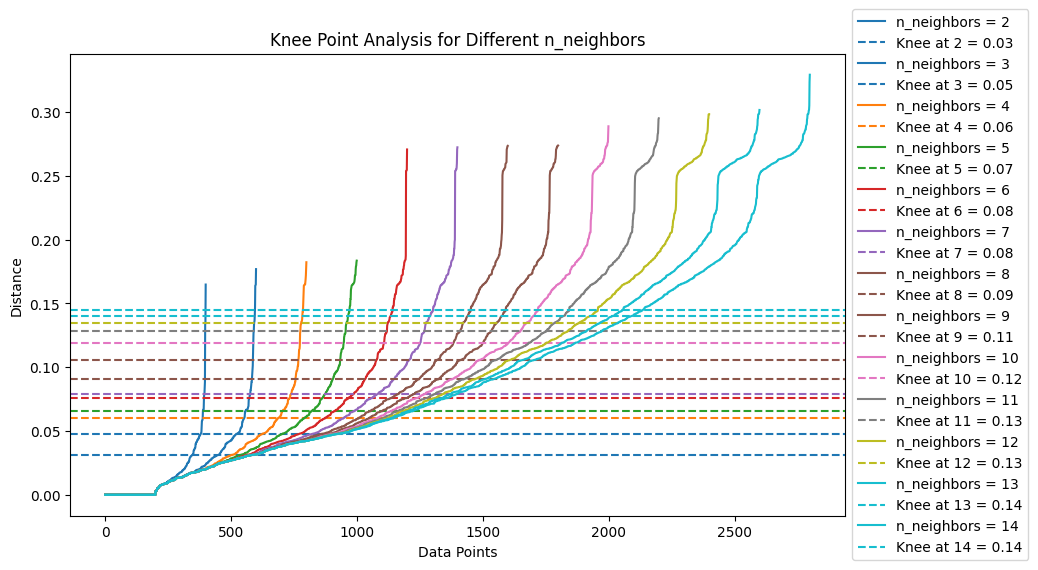

In [42]:
n_neighbors_list_gower = np.arange(2,limite_sup,1)
epsilon_list_gower = find_knee_points(distancias_gower, n_neighbors_list_gower, metric='precomputed', graficar=True)

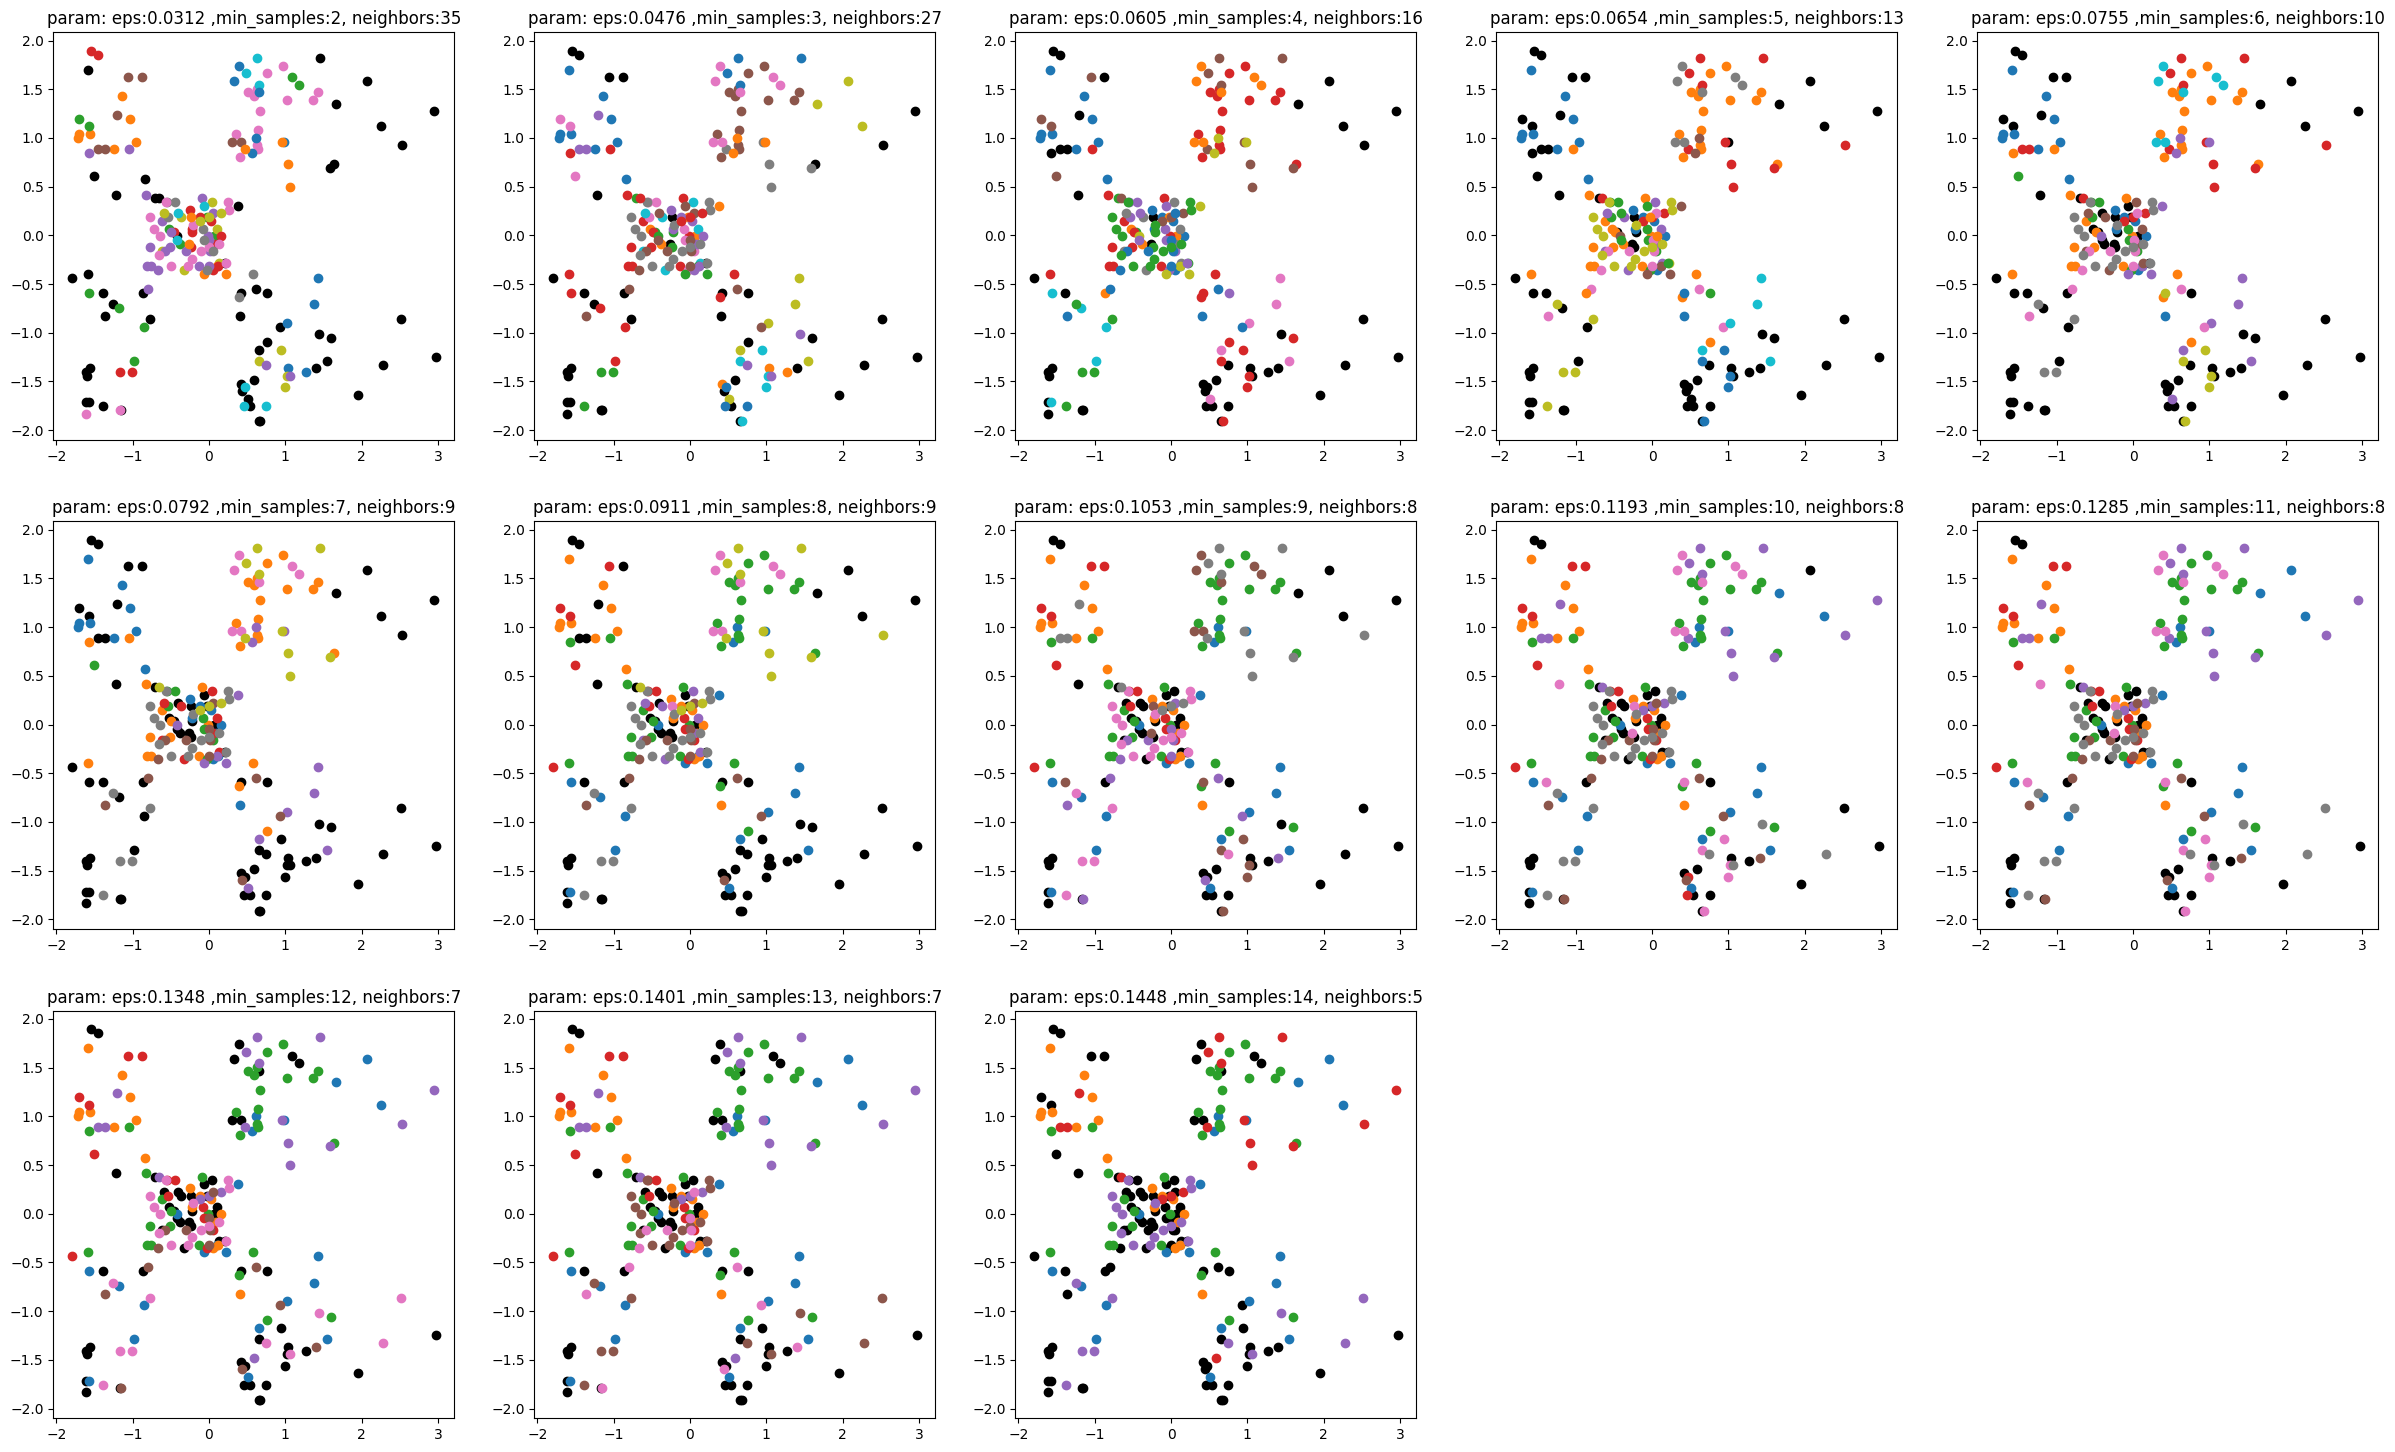

In [43]:
from sklearn.cluster import DBSCAN

arr_silhouettes = []

combinaciones_prueba_gower = list(zip(epsilon_list_gower ,n_neighbors_list_gower))



n_cols = 5
n_rows = int(np.ceil(len(combinaciones_prueba_gower)/n_cols))


fig, ax = plt.subplots(n_rows, n_cols,figsize=(n_cols*6,n_rows*6))
axs = ax.flatten()

for i,(eps,min_samples) in enumerate(combinaciones_prueba_gower):

    db = DBSCAN(eps = eps, min_samples = min_samples, metric="precomputed").fit(distancias_gower)
    clusteres = db.labels_
    n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
    resultado = pd.DataFrame(df_datos_scaled_categ).assign(Cluster = clusteres)


    silhouette = silhouette_score(distancias_gower, clusteres, metric="precomputed")
    arr_silhouettes.append(silhouette)
    
    for k in np.unique(clusteres):
        if k != -1:
            axs[i].scatter(
                x = resultado.loc[resultado.Cluster == k, 0], 
                y = resultado.loc[resultado.Cluster == k, 1]
                )
        else:
            axs[i].scatter(
                x = resultado.loc[resultado.Cluster == k, 0], 
                y = resultado.loc[resultado.Cluster == k, 1],
                c = "black"
                )
            
    axs[i].set_title("param: eps:{e:.4f} ,min_samples:{s}, neighbors:{n}".format(e=eps,s=min_samples,n=n_clusteres))
            

for j in range(i + 1, n_rows * n_cols):
    axs[j].axis('off')

In [ ]:
combinaciones_prueba_gower[np.argmax(arr_silhouettes)]

(0.12852375, 11)

In [ ]:
!pip install session_info

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/79.8 kB ? eta -:--:--
   ---------------------------------------- 79.8/79.8 kB 4.3 MB/s eta 0:00:00
  Created wheel for session_info: filename=session_info-1.0.0-py3-none-any.whl size=8074 sha256=0124c1b50e93090eca287db87fe8f69d59a54fb454c57140c9bf85b417a7718b
  Stored in directory: c:\users\paul\appdata\local\pip\cache\wheels\6a\aa\b9\eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session_info


In [ ]:
import session_info

session_info.show(html=False)

-----
matplotlib          3.8.4
numpy               1.26.4
pandas              2.2.1
scipy               1.12.0
seaborn             0.13.2
session_info        1.0.0
sklearn             1.3.0
-----
IPython             8.22.2
jupyter_client      8.6.1
jupyter_core        5.7.2
-----
Python 3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:15:57) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.22621-SP0
-----
Session information updated at 2024-08-30 19:40
